In [2]:
#Package Import 
import pandas as pd
import random
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import os
import glob
import collections
import networkx as nx
import seaborn

In [3]:
os.getcwd()

'/Users/yuanlingou/Desktop/Dissertation/Code/OneStopEng_2/data/paresed_features'

In [4]:
data_adv = pd.read_csv('/Users/yuanlingou/Desktop/Dissertation/Code/OneStopEng_2/data/paresed_features/adv/adv.tsv',sep='\t', header=0)

In [5]:
data_adv['label']=2

In [6]:
data_adv.head()

,TotalSentences,TotalWords/TotalSentences,numNouns+numProperNouns/TotalWords,numProperNouns/TotalWords,numPronouns/TotalWords,numConjunct/TotalWords,numAdj/TotalWords,numVerbs/TotalWords,numNP/TotalSentences,numVP/TotalSentences,...,C2 type %,Unlisted type %,A1 token %,A2 token %,B1 token %,B2 token %,C1 token %,C2 token %,Unlisted token %,label
0,36,13.42,0.32,0.04,0.14,0.03,0.06,0.26,6.50,3.97,...,3.13,18.18,52.66,9.98,10.14,8.05,3.38,2.09,13.69,2
1,52,14.62,0.36,0.08,0.06,0.04,0.10,0.23,6.62,3.94,...,2.07,15.35,58.20,9.66,8.09,7.64,2.70,1.80,11.91,2
2,39,14.08,0.38,0.10,0.10,0.04,0.08,0.23,6.74,3.82,...,2.83,22.00,56.08,11.73,8.53,6.08,1.71,1.49,14.39,2
3,26,21.88,0.31,0.07,0.08,0.04,0.12,0.24,9.50,6.31,...,1.88,19.95,54.91,12.72,9.57,6.55,0.76,1.26,14.23,2
4,42,18.74,0.40,0.17,0.07,0.05,0.10,0.17,9.02,3.67,...,1.99,17.90,57.70,10.61,8.93,7.24,3.23,0.91,11.38,2


In [237]:
data_adv.to_excel("adv_final.xlsx")  

In [7]:
len(data_adv)

189

In [8]:
data_int = pd.read_csv('/Users/yuanlingou/Desktop/Dissertation/Code/OneStopEng_2/data/paresed_features/int/int.tsv',sep='\t', header=0)

In [9]:
data_int['label']=1

In [238]:
data_int.to_excel("int_final.xlsx")  

In [10]:
data_ele = pd.read_csv('/Users/yuanlingou/Desktop/Dissertation/Code/OneStopEng_2/data/paresed_features/ele/ele.tsv',sep='\t', header=0)

In [11]:
data_ele['label']=0

In [239]:
data_ele.to_excel("ele_final.xlsx")  

### Exploration 

In [12]:
data_adv.describe()

,TotalSentences,TotalWords/TotalSentences,numNouns+numProperNouns/TotalWords,numProperNouns/TotalWords,numPronouns/TotalWords,numConjunct/TotalWords,numAdj/TotalWords,numVerbs/TotalWords,numNP/TotalSentences,numVP/TotalSentences,...,C2 type %,Unlisted type %,A1 token %,A2 token %,B1 token %,B2 token %,C1 token %,C2 token %,Unlisted token %,label
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,...,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.0
mean,38.063492,18.026667,0.363810,0.085132,0.068466,0.042222,0.106138,0.213810,8.334815,4.493598,...,2.013333,17.857884,55.728677,11.846561,9.612434,6.814550,1.890899,1.171323,12.935873,2.0
std,10.455895,2.787212,0.040083,0.035304,0.030129,0.010228,0.020946,0.022248,1.423907,0.842030,...,0.855410,4.025259,5.062393,2.102134,1.971764,2.039877,1.005692,0.640202,3.194289,0.0
min,13.000000,11.050000,0.220000,0.020000,0.010000,0.020000,0.060000,0.150000,5.060000,2.430000,...,0.000000,9.010000,43.920000,6.840000,3.150000,1.750000,0.480000,0.000000,5.210000,2.0
25%,31.000000,15.970000,0.340000,0.060000,0.040000,0.030000,0.090000,0.200000,7.330000,3.900000,...,1.430000,14.920000,51.720000,10.370000,8.430000,5.430000,1.280000,0.760000,10.780000,2.0
50%,38.000000,17.910000,0.370000,0.080000,0.060000,0.040000,0.100000,0.210000,8.270000,4.430000,...,1.960000,17.690000,55.760000,11.720000,9.400000,6.430000,1.710000,1.050000,13.170000,2.0
75%,44.000000,20.100000,0.390000,0.110000,0.090000,0.050000,0.120000,0.230000,9.340000,5.120000,...,2.720000,20.560000,59.210000,13.180000,10.900000,7.970000,2.180000,1.490000,14.960000,2.0
max,81.000000,24.790000,0.460000,0.190000,0.180000,0.080000,0.170000,0.270000,12.320000,6.910000,...,5.310000,32.820000,71.700000,18.320000,14.820000,12.330000,8.640000,4.300000,21.220000,2.0


In [13]:
data_ele.describe()

,TotalSentences,TotalWords/TotalSentences,numNouns+numProperNouns/TotalWords,numProperNouns/TotalWords,numPronouns/TotalWords,numConjunct/TotalWords,numAdj/TotalWords,numVerbs/TotalWords,numNP/TotalSentences,numVP/TotalSentences,...,C2 type %,Unlisted type %,A1 token %,A2 token %,B1 token %,B2 token %,C1 token %,C2 token %,Unlisted token %,label
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,...,189.000000,189.000000,189.00000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.0
mean,32.010582,13.879841,0.362540,0.091640,0.078254,0.044550,0.101111,0.211058,6.473862,3.499365,...,0.736984,15.554339,61.69545,12.544074,8.311799,4.189048,0.900265,0.487407,11.872857,0.0
std,7.820452,1.790638,0.042837,0.041845,0.033208,0.011225,0.023071,0.024011,0.932917,0.668620,...,0.599849,4.518243,5.10513,2.801500,2.215381,1.713661,0.964091,0.592216,3.651637,0.0
min,14.000000,9.970000,0.230000,0.020000,0.010000,0.020000,0.050000,0.140000,4.530000,1.690000,...,0.000000,5.210000,45.06000,4.550000,1.820000,0.520000,0.000000,0.000000,3.910000,0.0
25%,26.000000,12.650000,0.340000,0.060000,0.050000,0.040000,0.080000,0.190000,5.830000,2.980000,...,0.350000,12.500000,57.95000,10.570000,6.820000,3.090000,0.360000,0.170000,9.450000,0.0
50%,32.000000,13.680000,0.360000,0.090000,0.070000,0.040000,0.100000,0.210000,6.350000,3.460000,...,0.680000,15.380000,61.76000,12.370000,8.190000,3.870000,0.630000,0.340000,11.820000,0.0
75%,37.000000,15.090000,0.390000,0.120000,0.100000,0.050000,0.120000,0.230000,7.140000,3.930000,...,1.070000,18.180000,64.43000,14.560000,9.730000,5.070000,1.110000,0.650000,14.030000,0.0
max,62.000000,19.780000,0.460000,0.220000,0.190000,0.080000,0.170000,0.280000,9.830000,5.350000,...,2.820000,38.020000,76.30000,22.450000,14.290000,10.310000,7.300000,4.970000,23.120000,0.0


In [241]:
data_int.describe()

,TotalSentences,TotalWords/TotalSentences,numNouns+numProperNouns/TotalWords,numProperNouns/TotalWords,numPronouns/TotalWords,numConjunct/TotalWords,numAdj/TotalWords,numVerbs/TotalWords,numNP/TotalSentences,numVP/TotalSentences,...,C2 type %,Unlisted type %,A1 token %,A2 token %,B1 token %,B2 token %,C1 token %,C2 token %,Unlisted token %,label
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,...,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.0
mean,35.105820,16.069630,0.362751,0.086614,0.072116,0.043545,0.104021,0.214286,7.449101,4.037143,...,1.260000,16.985344,57.858571,12.162963,9.847884,5.880741,1.415079,0.784762,12.049947,1.0
std,8.575039,2.223075,0.041384,0.037518,0.031870,0.010600,0.022115,0.022928,1.125137,0.757980,...,0.703544,3.981815,4.912365,2.435607,2.223492,1.928915,0.988735,0.575833,3.144634,0.0
min,14.000000,10.840000,0.220000,0.020000,0.010000,0.020000,0.050000,0.150000,4.560000,2.430000,...,0.000000,6.860000,45.830000,6.400000,2.920000,1.280000,0.000000,0.000000,3.690000,1.0
25%,29.000000,14.670000,0.330000,0.060000,0.050000,0.040000,0.090000,0.200000,6.670000,3.520000,...,0.750000,14.100000,54.400000,10.500000,8.370000,4.490000,0.770000,0.390000,9.980000,1.0
50%,34.000000,16.100000,0.360000,0.090000,0.060000,0.040000,0.100000,0.210000,7.430000,3.940000,...,1.150000,16.510000,58.000000,11.840000,9.770000,5.640000,1.230000,0.650000,12.030000,1.0
75%,40.000000,17.260000,0.390000,0.110000,0.090000,0.050000,0.120000,0.230000,8.140000,4.570000,...,1.680000,19.510000,60.990000,13.800000,11.340000,6.780000,1.730000,1.030000,13.730000,1.0
max,69.000000,22.950000,0.470000,0.200000,0.180000,0.080000,0.160000,0.270000,10.350000,6.430000,...,3.770000,33.330000,73.600000,19.970000,16.170000,11.820000,7.980000,4.170000,20.130000,1.0


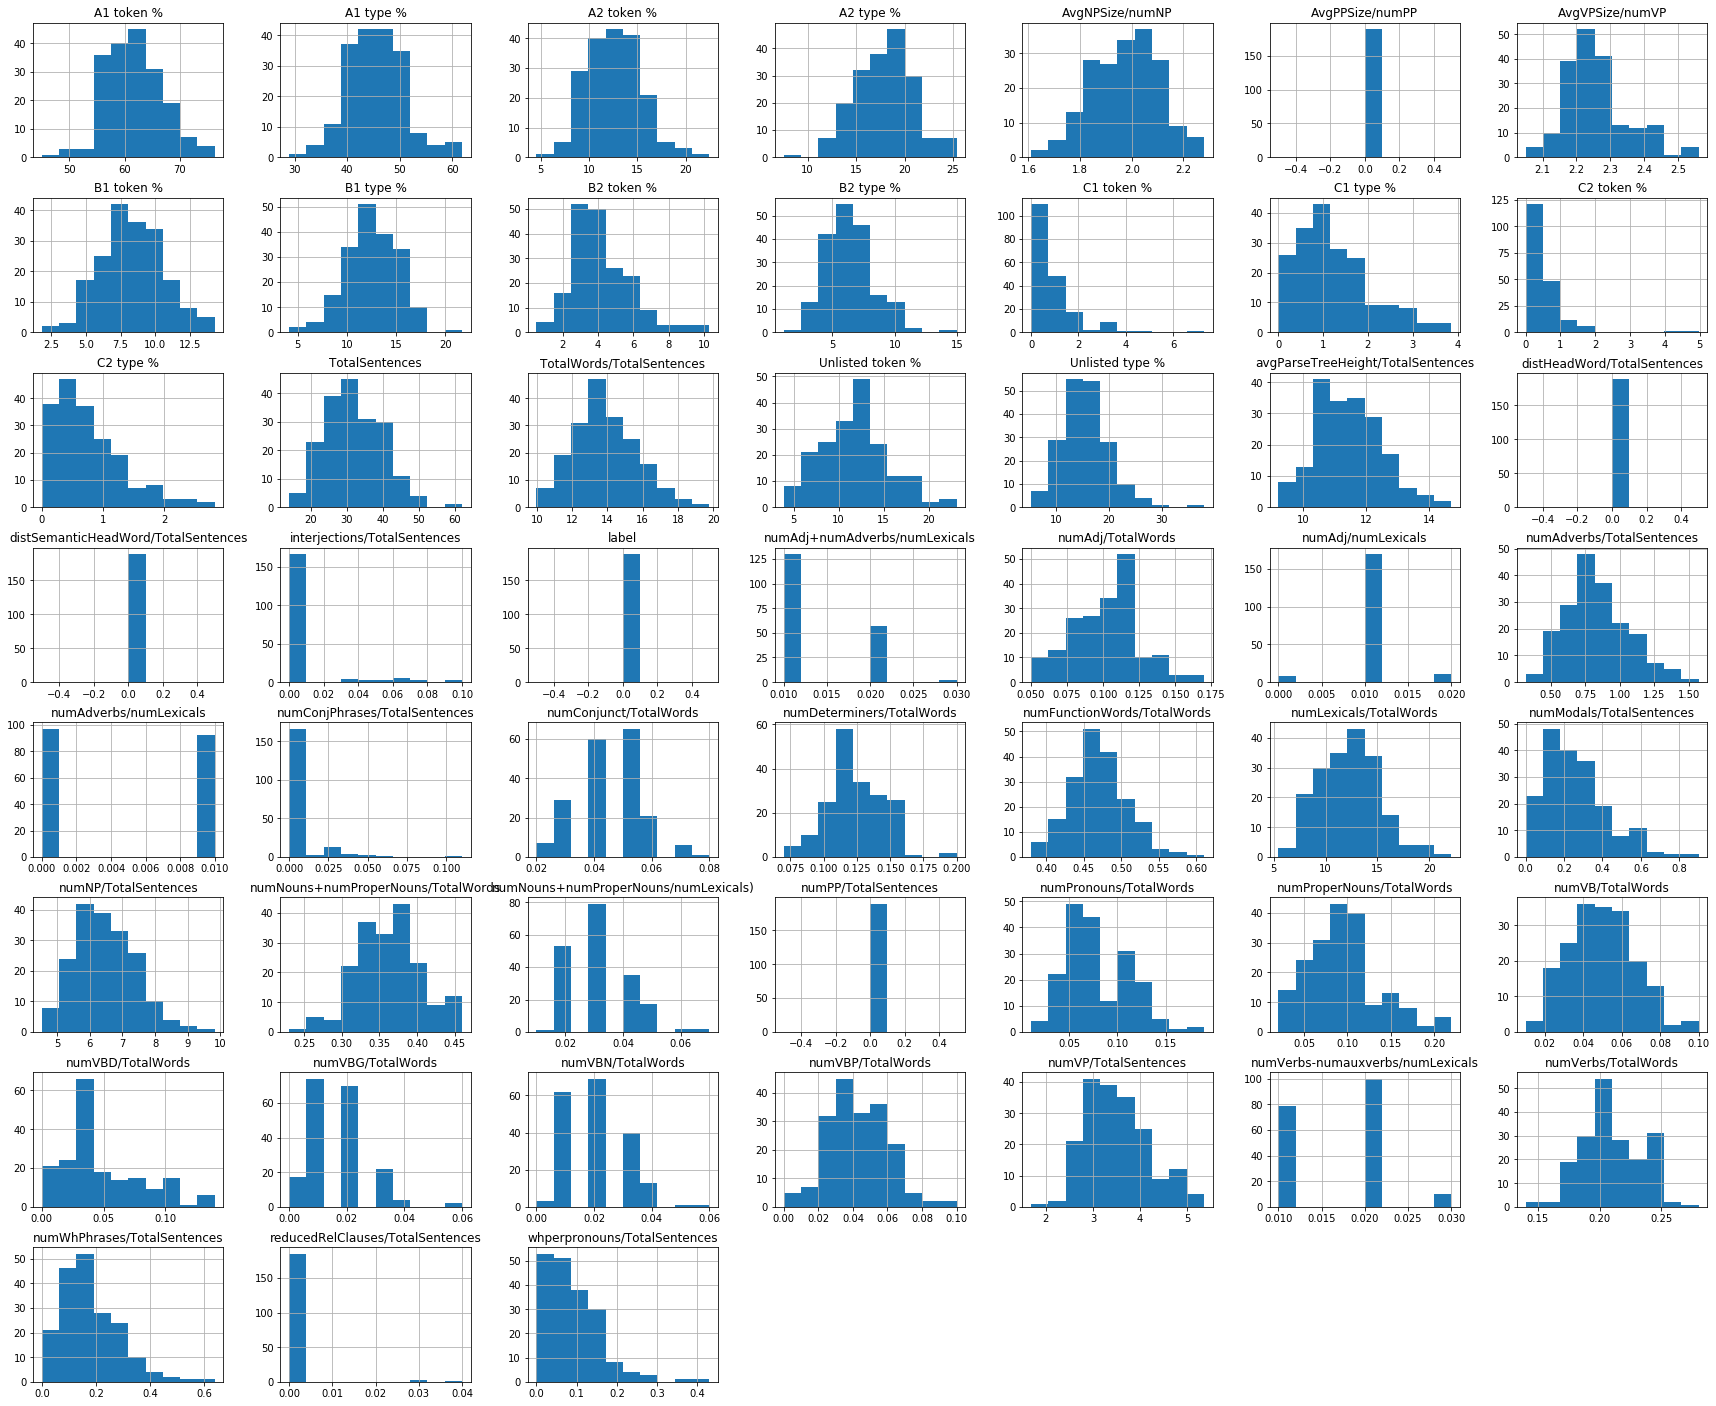

In [14]:
import matplotlib.pyplot as plt
data_ele.hist(bins=10,figsize=(30,25))
plt.show()

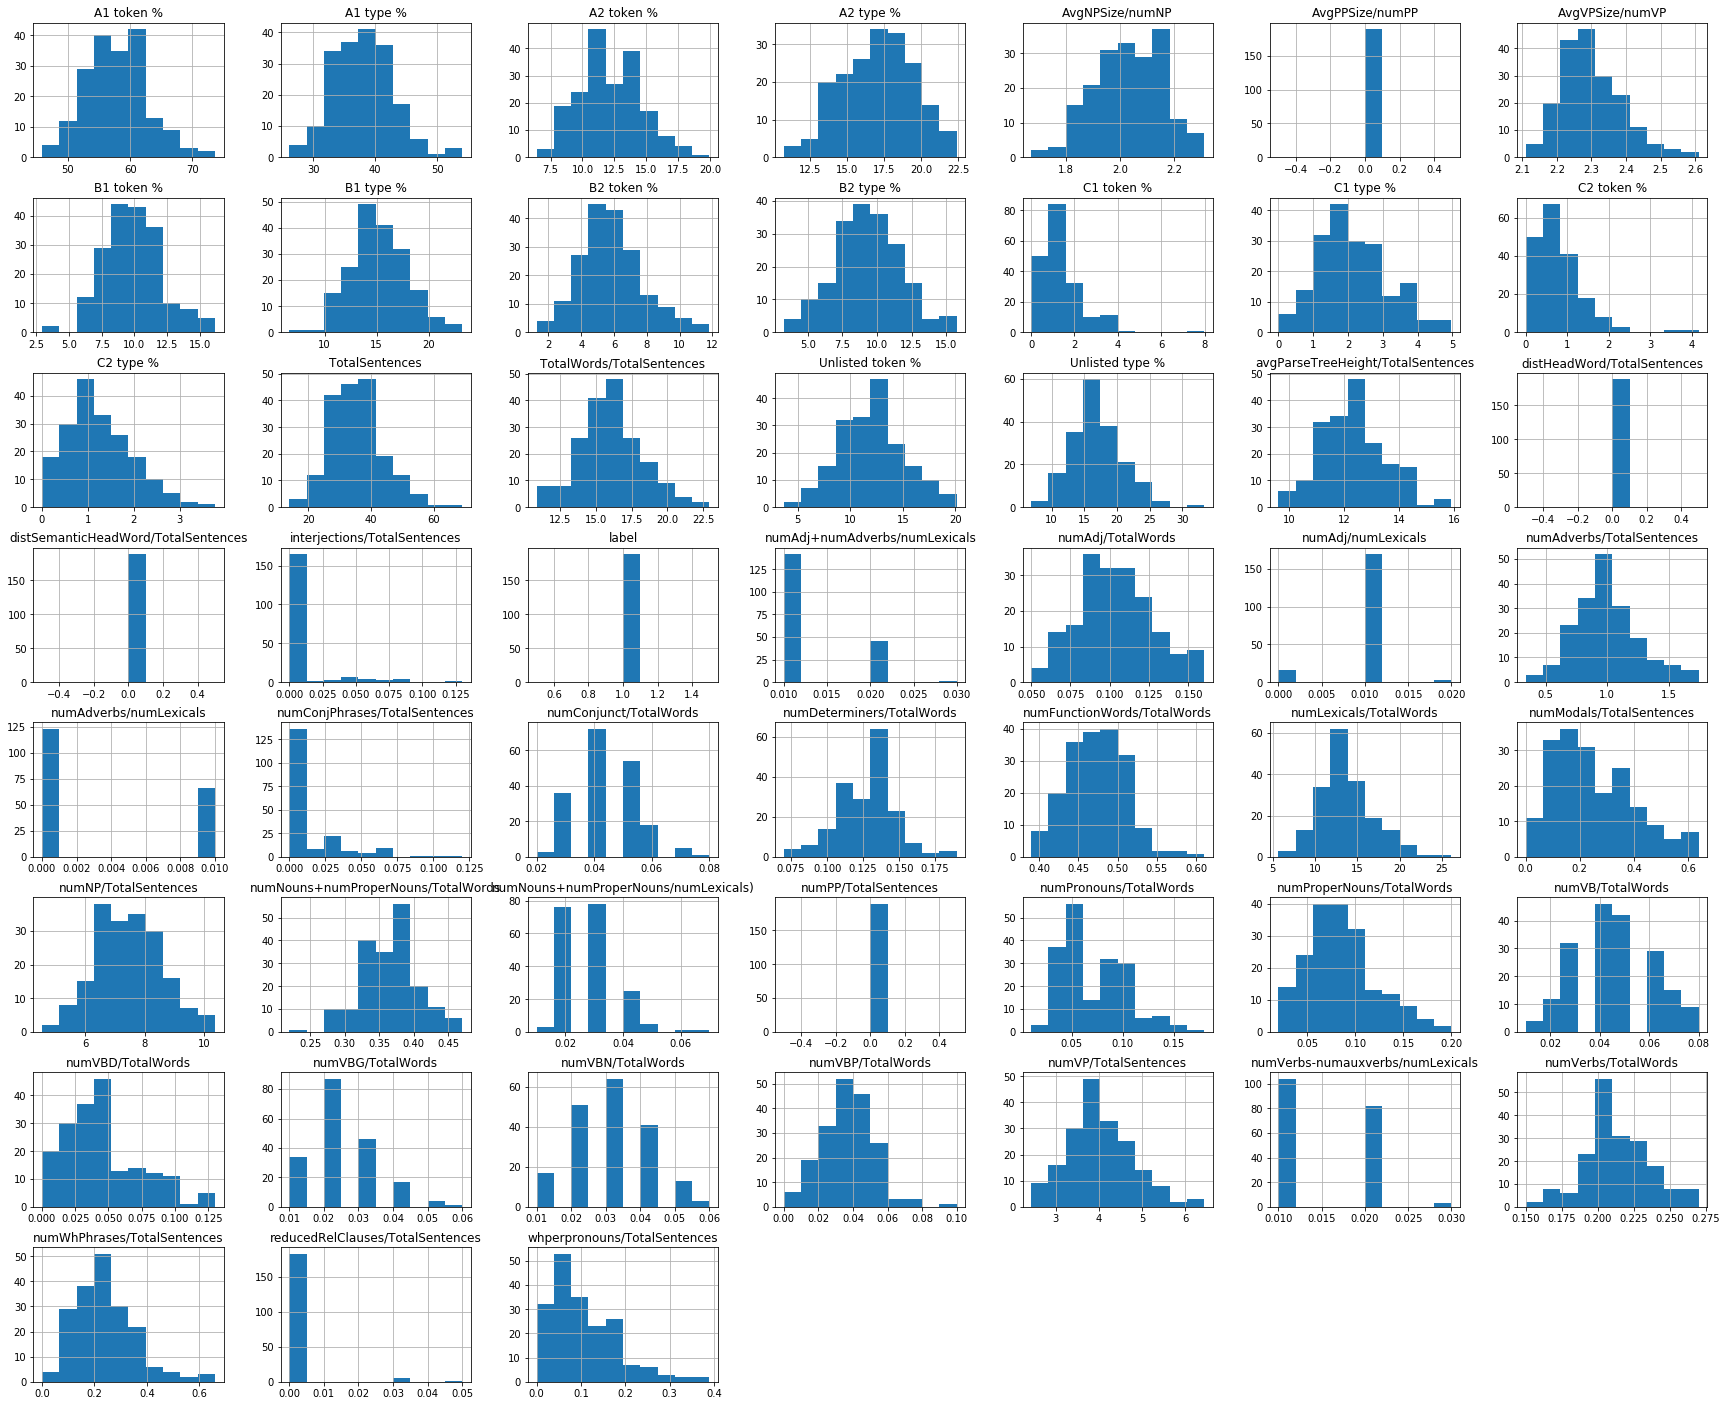

In [15]:
import matplotlib.pyplot as plt
data_int.hist(bins=10,figsize=(30,25))
plt.show()

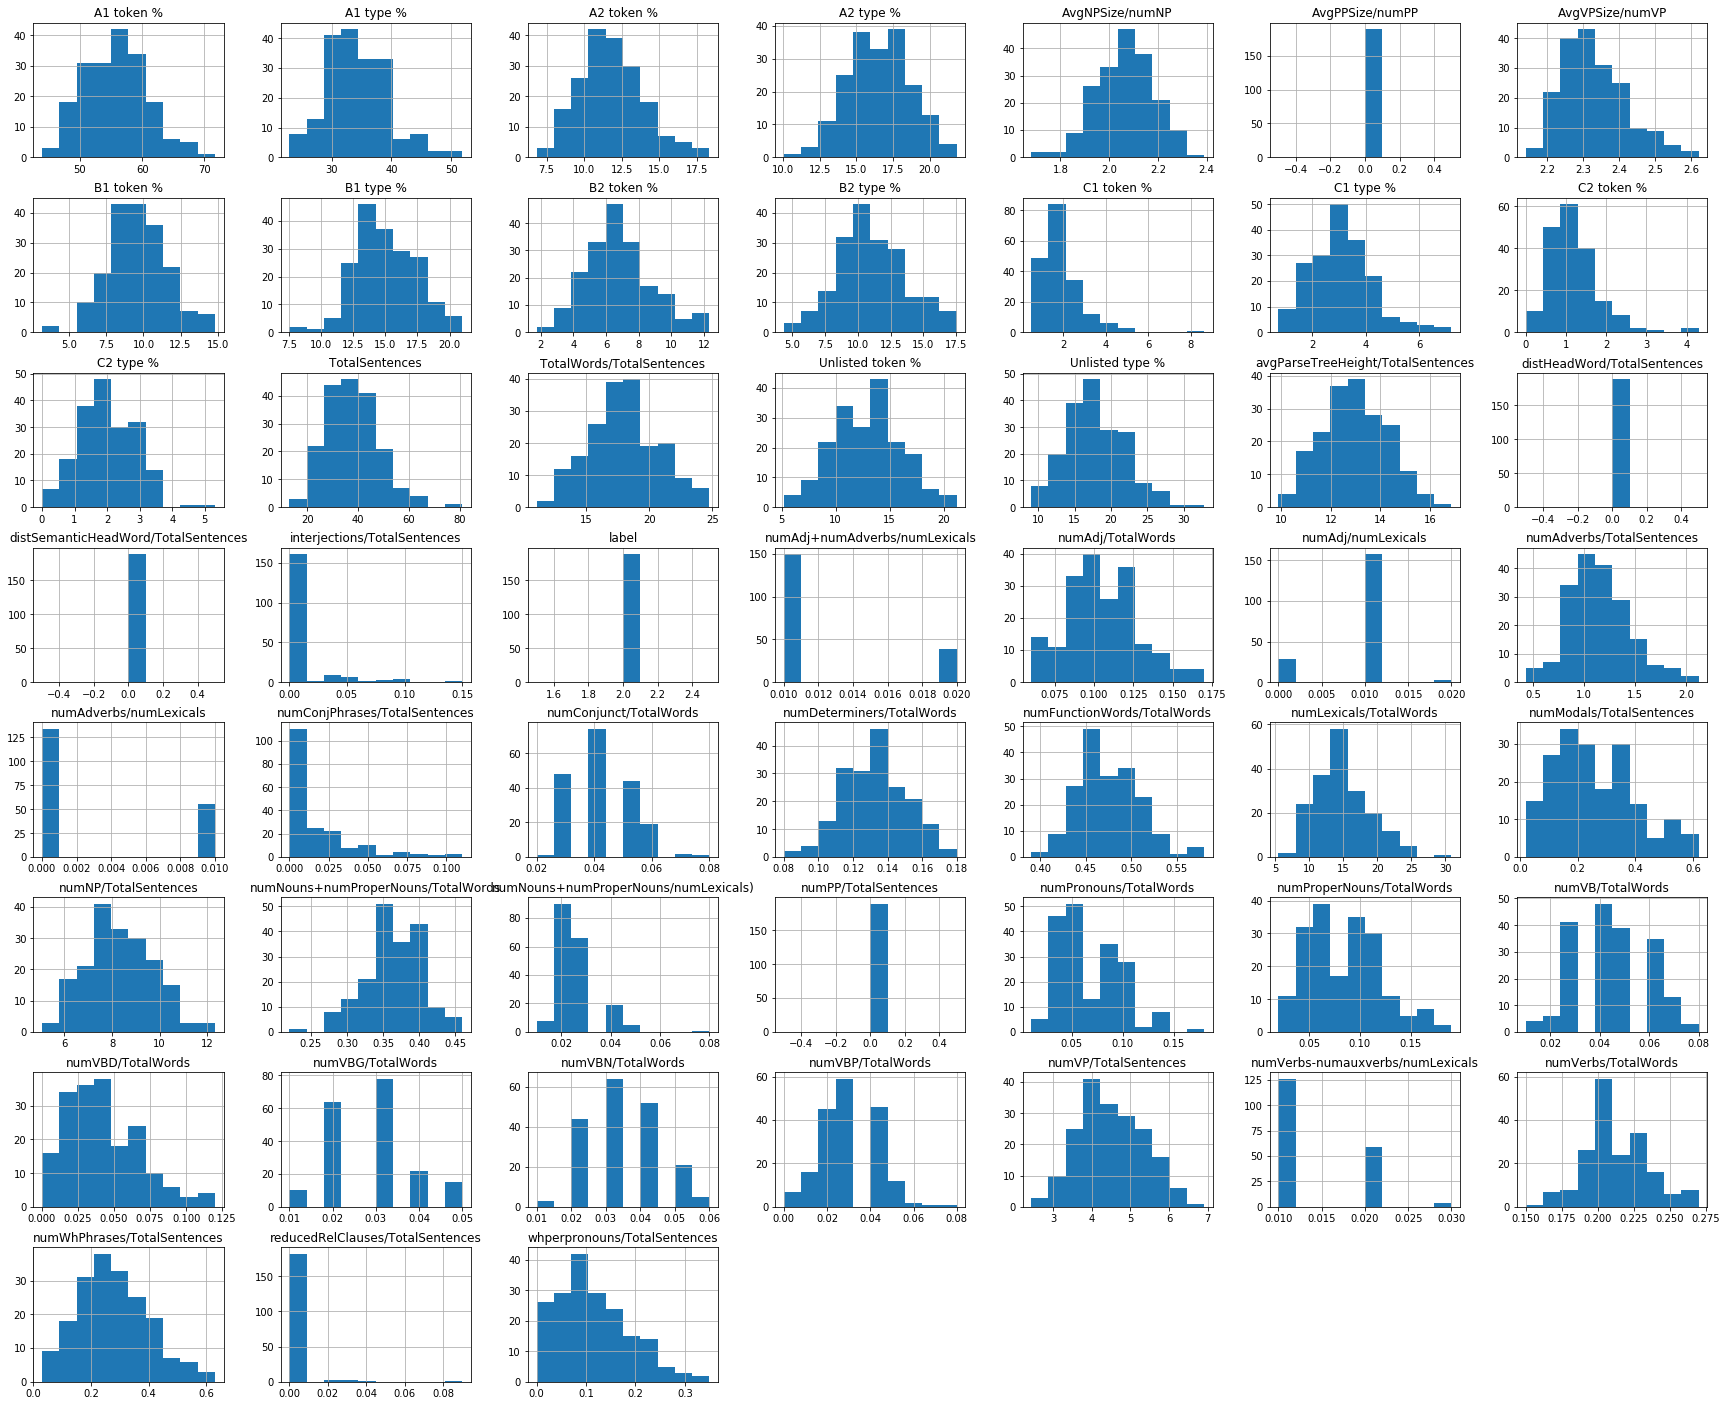

In [16]:
import matplotlib.pyplot as plt
data_adv.hist(bins=10,figsize=(30,25))
plt.show()

/Users/yuanlingou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/Users/yuanlingou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/yuanlingou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes 

Text(0.5, 1.0, 'ADV_A1token')

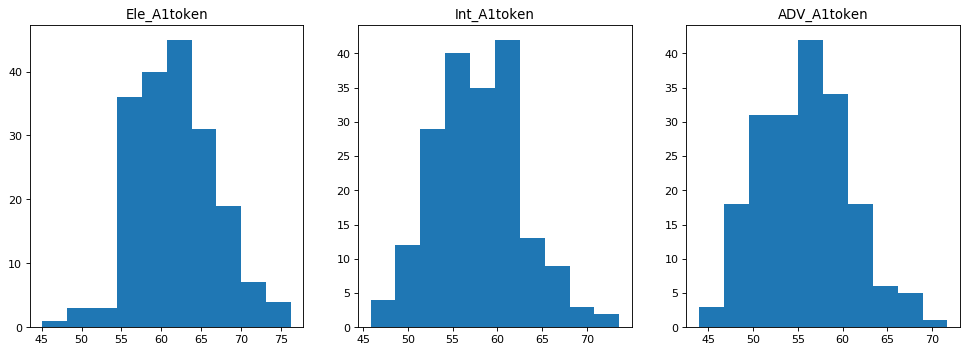

In [17]:
# A1 ele
fig = plt.figure(figsize=(15,5), dpi=80) 
ax1=plt.subplot(1,3,1)
plt.subplot(1,3,1).hist(x=data_ele['A1 token %'], bins=10) 
ax1.set_title("Ele_A1token") 
# A1 int
ax2=plt.subplot(1,3,2)
plt.subplot(1,3,2).hist(x=data_int['A1 token %'], bins=10) 
ax2.set_title("Int_A1token") 
# A1 adv
ax3=plt.subplot(1,3,3)
plt.subplot(1,3,3).hist(x=data_adv['A1 token %'], bins=10) 
ax3.set_title("ADV_A1token") 

/Users/yuanlingou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/Users/yuanlingou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/yuanlingou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes 

Text(0.5, 1.0, 'ADV_A1type')

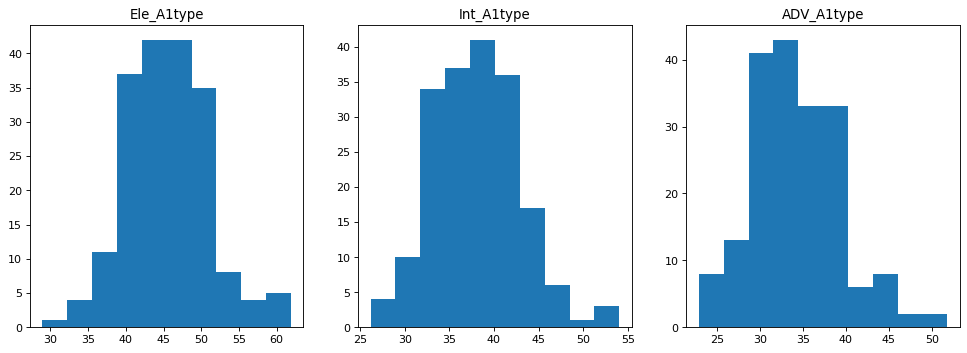

In [18]:
# A1 ele
fig = plt.figure(figsize=(15,5), dpi=80) 
ax1=plt.subplot(1,3,1)
plt.subplot(1,3,1).hist(x=data_ele['A1 type %'], bins=10) 
ax1.set_title("Ele_A1type") 
# A1 int
ax2=plt.subplot(1,3,2)
plt.subplot(1,3,2).hist(x=data_int['A1 type %'], bins=10) 
ax2.set_title("Int_A1type") 
# A1 adv
ax3=plt.subplot(1,3,3)
plt.subplot(1,3,3).hist(x=data_adv['A1 type %'], bins=10) 
ax3.set_title("ADV_A1type") 

/Users/yuanlingou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/Users/yuanlingou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/yuanlingou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes 

Text(0.5, 1.0, 'ADV_C2type')

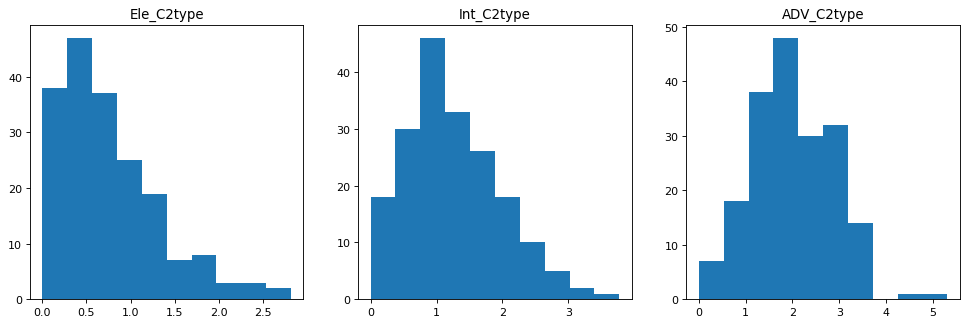

In [19]:
# C2 ele
fig = plt.figure(figsize=(15,10), dpi=80) 
ax1=plt.subplot(2,3,1)
plt.subplot(2,3,1).hist(x=data_ele['C2 type %'], bins=10) 
ax1.set_title("Ele_C2type") 
# C2 int
ax2=plt.subplot(2,3,2)
plt.subplot(2,3,2).hist(x=data_int['C2 type %'], bins=10) 
ax2.set_title("Int_C2type") 
# C2 adv
ax3=plt.subplot(2,3,3)
plt.subplot(2,3,3).hist(x=data_adv['C2 type %'], bins=10) 
ax3.set_title("ADV_C2type") 


/Users/yuanlingou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/Users/yuanlingou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/yuanlingou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes 

Text(0.5, 1.0, 'ADV_C2token')

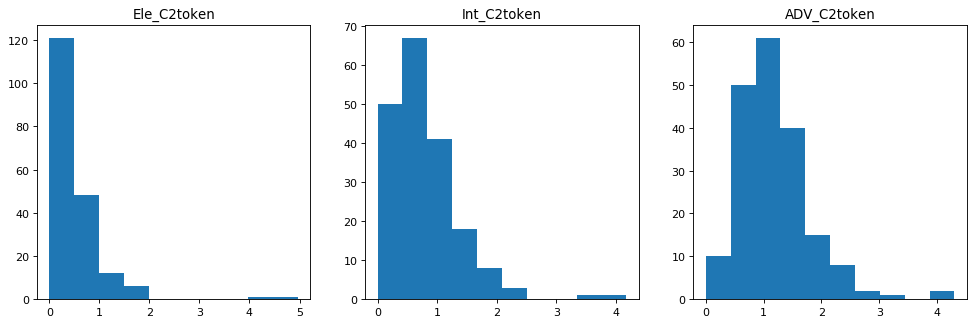

In [20]:
# C2 ele
fig = plt.figure(figsize=(15,10), dpi=80) 
ax4=plt.subplot(2,3,4)
plt.subplot(2,3,4).hist(x=data_ele['C2 token %'], bins=10) 
ax4.set_title("Ele_C2token") 
# C2 int
ax5=plt.subplot(2,3,5)
plt.subplot(2,3,5).hist(x=data_int['C2 token %'], bins=10) 
ax5.set_title("Int_C2token") 
# C2 adv
ax6=plt.subplot(2,3,6)
plt.subplot(2,3,6).hist(x=data_adv['C2 token %'], bins=10) 
ax6.set_title("ADV_C2token") 

/Users/yuanlingou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/Users/yuanlingou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/yuanlingou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes 

Text(0.5, 1.0, 'adv_Unlisted token %')

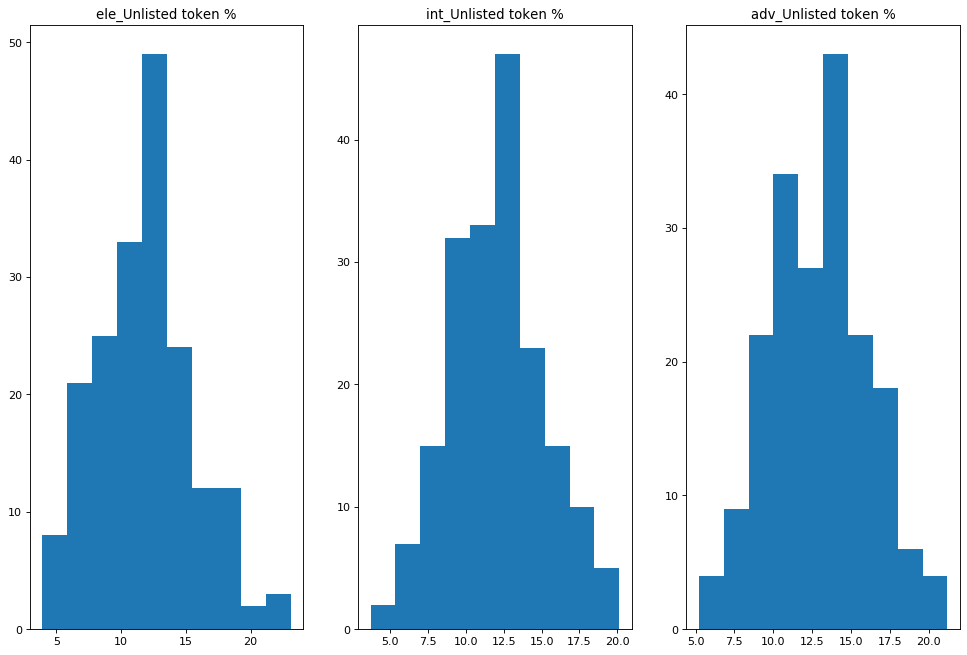

In [21]:
# unlist ele
fig = plt.figure(figsize=(15,10), dpi=80) 
ax4=plt.subplot(1,3,1)
plt.subplot(1,3,1).hist(x=data_ele['Unlisted token %'], bins=10) 
ax4.set_title("ele_Unlisted token %") 
# unlist ele
ax5=plt.subplot(1,3,2)
plt.subplot(1,3,2).hist(x=data_int['Unlisted token %'], bins=10) 
ax5.set_title("int_Unlisted token %") 
# unlist ele
ax6=plt.subplot(1,3,3)
plt.subplot(1,3,3).hist(x=data_adv['Unlisted token %'], bins=10) 
ax6.set_title("adv_Unlisted token %") 

In [22]:
finalDF=pd.concat([data_ele, data_int,data_adv], axis=0)

In [23]:
finalDF

,TotalSentences,TotalWords/TotalSentences,numNouns+numProperNouns/TotalWords,numProperNouns/TotalWords,numPronouns/TotalWords,numConjunct/TotalWords,numAdj/TotalWords,numVerbs/TotalWords,numNP/TotalSentences,numVP/TotalSentences,...,C2 type %,Unlisted type %,A1 token %,A2 token %,B1 token %,B2 token %,C1 token %,C2 token %,Unlisted token %,label
0,34,15.62,0.40,0.17,0.07,0.07,0.06,0.20,8.00,3.85,...,1.45,14.98,60.48,10.24,6.19,5.48,3.57,0.95,13.10,0
1,27,14.85,0.35,0.09,0.05,0.05,0.08,0.21,6.44,4.44,...,0.00,12.56,66.82,9.84,7.32,4.35,1.37,0.00,10.30,0
2,28,17.79,0.34,0.10,0.10,0.05,0.11,0.23,8.79,4.96,...,0.42,17.23,62.83,14.13,7.39,2.61,0.43,0.22,12.39,0
3,23,12.83,0.32,0.09,0.13,0.02,0.08,0.24,6.00,3.78,...,1.18,11.37,63.33,15.83,7.08,5.00,0.42,0.62,7.71,0
4,31,15.65,0.37,0.12,0.05,0.03,0.11,0.22,6.81,4.32,...,0.54,17.74,62.77,12.89,5.01,3.10,3.10,0.24,12.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,37,21.92,0.39,0.11,0.06,0.04,0.09,0.21,10.35,5.24,...,1.59,17.95,55.73,12.31,8.92,7.75,1.06,0.85,13.38,2
185,28,15.86,0.46,0.12,0.03,0.04,0.12,0.21,8.39,3.75,...,1.88,14.23,68.34,10.72,3.15,4.85,1.53,0.77,10.64,2
186,39,13.51,0.32,0.11,0.10,0.04,0.09,0.23,6.10,3.51,...,2.01,18.30,60.48,13.76,7.32,4.80,1.39,1.01,11.24,2
187,42,17.10,0.34,0.06,0.04,0.04,0.13,0.22,7.29,4.26,...,1.21,20.97,50.60,15.19,8.55,5.43,2.21,0.60,17.40,2


In [240]:
finalDF.to_excel("final_df.xlsx")  

In [24]:
finalDF=finalDF.drop("TotalSentences",axis=1)

In [25]:
finalDF

,TotalWords/TotalSentences,numNouns+numProperNouns/TotalWords,numProperNouns/TotalWords,numPronouns/TotalWords,numConjunct/TotalWords,numAdj/TotalWords,numVerbs/TotalWords,numNP/TotalSentences,numVP/TotalSentences,numPP/TotalSentences,...,C2 type %,Unlisted type %,A1 token %,A2 token %,B1 token %,B2 token %,C1 token %,C2 token %,Unlisted token %,label
0,15.62,0.40,0.17,0.07,0.07,0.06,0.20,8.00,3.85,0,...,1.45,14.98,60.48,10.24,6.19,5.48,3.57,0.95,13.10,0
1,14.85,0.35,0.09,0.05,0.05,0.08,0.21,6.44,4.44,0,...,0.00,12.56,66.82,9.84,7.32,4.35,1.37,0.00,10.30,0
2,17.79,0.34,0.10,0.10,0.05,0.11,0.23,8.79,4.96,0,...,0.42,17.23,62.83,14.13,7.39,2.61,0.43,0.22,12.39,0
3,12.83,0.32,0.09,0.13,0.02,0.08,0.24,6.00,3.78,0,...,1.18,11.37,63.33,15.83,7.08,5.00,0.42,0.62,7.71,0
4,15.65,0.37,0.12,0.05,0.03,0.11,0.22,6.81,4.32,0,...,0.54,17.74,62.77,12.89,5.01,3.10,3.10,0.24,12.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,21.92,0.39,0.11,0.06,0.04,0.09,0.21,10.35,5.24,0,...,1.59,17.95,55.73,12.31,8.92,7.75,1.06,0.85,13.38,2
185,15.86,0.46,0.12,0.03,0.04,0.12,0.21,8.39,3.75,0,...,1.88,14.23,68.34,10.72,3.15,4.85,1.53,0.77,10.64,2
186,13.51,0.32,0.11,0.10,0.04,0.09,0.23,6.10,3.51,0,...,2.01,18.30,60.48,13.76,7.32,4.80,1.39,1.01,11.24,2
187,17.10,0.34,0.06,0.04,0.04,0.13,0.22,7.29,4.26,0,...,1.21,20.97,50.60,15.19,8.55,5.43,2.21,0.60,17.40,2


In [26]:
#Check missing value 
finalDF.isna().sum()

TotalWords/TotalSentences               0
numNouns+numProperNouns/TotalWords      0
numProperNouns/TotalWords               0
numPronouns/TotalWords                  0
numConjunct/TotalWords                  0
numAdj/TotalWords                       0
numVerbs/TotalWords                     0
numNP/TotalSentences                    0
numVP/TotalSentences                    0
numPP/TotalSentences                    0
AvgNPSize/numNP                         0
AvgVPSize/numVP                         0
AvgPPSize/numPP                         0
avgParseTreeHeight/TotalSentences       0
numLexicals/TotalWords                  0
numAdverbs/numLexicals                  0
numAdj/numLexicals                      0
numAdj+numAdverbs/numLexicals           0
numNouns+numProperNouns/numLexicals)    0
numVerbs-numauxverbs/numLexicals        0
distHeadWord/TotalSentences             0
distSemanticHeadWord/TotalSentences     0
numWhPhrases/TotalSentences             0
reducedRelClauses/TotalSentences  

### Split dependent and indenpendent Variable 

In [293]:
# Split dependent and independent Variable 
from sklearn.model_selection import train_test_split
X=finalDF.iloc[:,:-1]
y=finalDF.iloc[:,-1]

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [28]:
X

,TotalWords/TotalSentences,numNouns+numProperNouns/TotalWords,numProperNouns/TotalWords,numPronouns/TotalWords,numConjunct/TotalWords,numAdj/TotalWords,numVerbs/TotalWords,numNP/TotalSentences,numVP/TotalSentences,numPP/TotalSentences,...,C1 type %,C2 type %,Unlisted type %,A1 token %,A2 token %,B1 token %,B2 token %,C1 token %,C2 token %,Unlisted token %
0,15.62,0.40,0.17,0.07,0.07,0.06,0.20,8.00,3.85,0,...,3.86,1.45,14.98,60.48,10.24,6.19,5.48,3.57,0.95,13.10
1,14.85,0.35,0.09,0.05,0.05,0.08,0.21,6.44,4.44,0,...,1.40,0.00,12.56,66.82,9.84,7.32,4.35,1.37,0.00,10.30
2,17.79,0.34,0.10,0.10,0.05,0.11,0.23,8.79,4.96,0,...,0.84,0.42,17.23,62.83,14.13,7.39,2.61,0.43,0.22,12.39
3,12.83,0.32,0.09,0.13,0.02,0.08,0.24,6.00,3.78,0,...,0.78,1.18,11.37,63.33,15.83,7.08,5.00,0.42,0.62,7.71
4,15.65,0.37,0.12,0.05,0.03,0.11,0.22,6.81,4.32,0,...,1.61,0.54,17.74,62.77,12.89,5.01,3.10,3.10,0.24,12.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,21.92,0.39,0.11,0.06,0.04,0.09,0.21,10.35,5.24,0,...,2.27,1.59,17.95,55.73,12.31,8.92,7.75,1.06,0.85,13.38
185,15.86,0.46,0.12,0.03,0.04,0.12,0.21,8.39,3.75,0,...,2.72,1.88,14.23,68.34,10.72,3.15,4.85,1.53,0.77,10.64
186,13.51,0.32,0.11,0.10,0.04,0.09,0.23,6.10,3.51,0,...,2.76,2.01,18.30,60.48,13.76,7.32,4.80,1.39,1.01,11.24
187,17.10,0.34,0.06,0.04,0.04,0.13,0.22,7.29,4.26,0,...,3.83,1.21,20.97,50.60,15.19,8.55,5.43,2.21,0.60,17.40


In [29]:
X=X.astype(np.float64)

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567 entries, 0 to 188
Data columns (total 50 columns):
TotalWords/TotalSentences               567 non-null float64
numNouns+numProperNouns/TotalWords      567 non-null float64
numProperNouns/TotalWords               567 non-null float64
numPronouns/TotalWords                  567 non-null float64
numConjunct/TotalWords                  567 non-null float64
numAdj/TotalWords                       567 non-null float64
numVerbs/TotalWords                     567 non-null float64
numNP/TotalSentences                    567 non-null float64
numVP/TotalSentences                    567 non-null float64
numPP/TotalSentences                    567 non-null float64
AvgNPSize/numNP                         567 non-null float64
AvgVPSize/numVP                         567 non-null float64
AvgPPSize/numPP                         567 non-null float64
avgParseTreeHeight/TotalSentences       567 non-null float64
numLexicals/TotalWords                  5

In [31]:
len(y)

567

### Collinearity Check

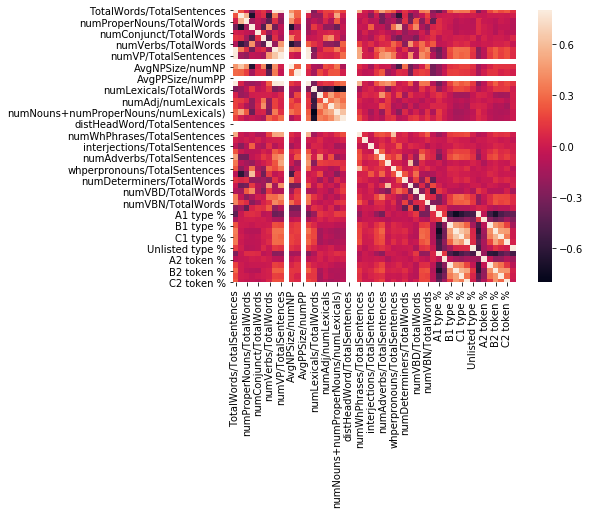

In [32]:
#correlation matrix
import seaborn as sns
corrmat = X.corr()
plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat, vmax=.8, square=True);

In [33]:
corrmat

,TotalWords/TotalSentences,numNouns+numProperNouns/TotalWords,numProperNouns/TotalWords,numPronouns/TotalWords,numConjunct/TotalWords,numAdj/TotalWords,numVerbs/TotalWords,numNP/TotalSentences,numVP/TotalSentences,numPP/TotalSentences,...,C1 type %,C2 type %,Unlisted type %,A1 token %,A2 token %,B1 token %,B2 token %,C1 token %,C2 token %,Unlisted token %
TotalWords/TotalSentences,1.000000,0.218717,0.026731,-0.320511,0.032026,0.117529,-0.095336,0.935191,0.788719,NaN,...,0.339439,0.343755,0.146625,-0.283000,-0.062448,0.168961,0.291833,0.194462,0.241106,0.105223
numNouns+numProperNouns/TotalWords,0.218717,1.000000,0.565078,-0.685658,0.009501,0.090608,-0.576415,0.364011,-0.157429,NaN,...,0.014009,-0.005771,0.021521,-0.016694,-0.023706,0.007819,0.009904,0.016605,0.001013,0.028090
numProperNouns/TotalWords,0.026731,0.565078,1.000000,-0.158429,-0.034826,-0.141844,-0.395823,0.094554,-0.216054,NaN,...,-0.042558,-0.053029,-0.079249,0.091397,-0.018664,-0.029555,-0.058187,0.003055,-0.022196,-0.077289
numPronouns/TotalWords,-0.320511,-0.685658,-0.158429,1.000000,-0.068317,-0.457045,0.434060,-0.342960,-0.048526,NaN,...,-0.059693,-0.053866,-0.066469,0.092508,0.022394,-0.015686,-0.081124,-0.037053,-0.036415,-0.088219
numConjunct/TotalWords,0.032026,0.009501,-0.034826,-0.068317,1.000000,0.097461,-0.185400,0.041854,-0.065053,NaN,...,-0.037132,-0.050375,-0.046195,0.074009,0.006712,-0.008593,-0.092055,-0.003865,-0.052237,-0.050801
numAdj/TotalWords,0.117529,0.090608,-0.141844,-0.457045,0.097461,1.000000,-0.411211,0.097803,-0.129485,NaN,...,0.036554,0.018525,0.068986,-0.059673,0.044356,-0.010951,0.017314,0.013188,-0.019525,0.062435
numVerbs/TotalWords,-0.095336,-0.576415,-0.395823,0.434060,-0.185400,-0.411211,1.000000,-0.199153,0.456357,NaN,...,0.053610,0.083946,-0.013722,-0.021933,0.010129,0.002103,0.039998,0.032211,0.067526,-0.021868
numNP/TotalSentences,0.935191,0.364011,0.094554,-0.342960,0.041854,0.097803,-0.199153,1.000000,0.642918,NaN,...,0.310147,0.301875,0.132808,-0.250254,-0.058849,0.165336,0.255708,0.167126,0.205977,0.089627
numVP/TotalSentences,0.788719,-0.157429,-0.216054,-0.048526,-0.065053,-0.129485,0.456357,0.642918,1.000000,NaN,...,0.270690,0.297567,0.110413,-0.229651,-0.068757,0.142000,0.254325,0.152465,0.206885,0.083497
numPP/TotalSentences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
x_copy=X

In [38]:
vif = pd.DataFrame()
vif["VIF Factor"] =[variance_inflation_factor(x_copy.values, i) for i in range(x_copy.shape[1])]
vif["features"] = x_copy.columns

/Users/yuanlingou/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [39]:
vif.sort_values(['VIF Factor'],ascending=False)

,VIF Factor,features
43,3.136149e+07,A1 token %
36,1.445817e+07,A1 type %
37,2.751651e+06,A2 type %
42,2.732813e+06,Unlisted type %
38,1.934483e+06,B1 type %
49,1.476336e+06,Unlisted token %
44,1.407705e+06,A2 token %
45,8.258934e+05,B1 token %
39,8.115980e+05,B2 type %
46,3.320633e+05,B2 token %


In [40]:
feature_drop=["A1 token %","A2 token %","B1 token %","B2 token %","C1 token %","C2 token %","TotalWords/TotalSentences","numNouns+numProperNouns/TotalWords","AvgNPSize/numNP","AvgVPSize/numVP","avgParseTreeHeight/TotalSentences","numFunctionWords/TotalWords","numVerbs/TotalWords","numVP/TotalSentences","numNP/TotalSentences","numLexicals/TotalWords","Unlisted token %","A1 type %"]
x_features_1=x_copy.drop(columns=feature_drop)

In [41]:
vif_f = pd.DataFrame()
vif_f["VIF Factor"] =[variance_inflation_factor(x_features_1.values, i) for i in range(x_features_1.shape[1])]
vif_f["features"] = x_features_1.columns

In [42]:
vif_f.sort_values(['VIF Factor'],ascending=False)

,VIF Factor,features
26,53.413634,A2 type %
3,44.235918,numAdj/TotalWords
20,39.789359,numDeterminers/TotalWords
27,36.772601,B1 type %
9,32.027267,numNouns+numProperNouns/numLexicals)
17,29.862176,numAdverbs/TotalSentences
8,23.428921,numAdj+numAdverbs/numLexicals
28,23.091844,B2 type %
21,22.509160,numVB/TotalWords
10,21.681921,numVerbs-numauxverbs/numLexicals


In [43]:
feature_drop_1=["numAdj/TotalWords","B1 type %","numNouns+numProperNouns/numLexicals)","numDeterminers/TotalWords","numAdverbs/TotalSentences"]
x_features_2=x_features_1.drop(columns=feature_drop_1)

In [44]:
vif_f = pd.DataFrame()
vif_f["VIF Factor"] =[variance_inflation_factor(x_features_2.values, i) for i in range(x_features_2.shape[1])]
vif_f["features"] = x_features_2.columns
vif_f.sort_values(['VIF Factor'],ascending=False)

,VIF Factor,features
22,38.456571,A2 type %
17,21.071421,numVB/TotalWords
23,19.308696,B2 type %
2,16.508846,numConjunct/TotalWords
26,15.730291,Unlisted type %
7,14.651893,numAdj+numAdverbs/numLexicals
8,14.217230,numVerbs-numauxverbs/numLexicals
1,13.237369,numPronouns/TotalWords
6,10.525052,numAdj/numLexicals
11,9.778327,numWhPhrases/TotalSentences


In [45]:
feature_drop_2=["A2 type %","numVB/TotalWords","B2 type %","numConjunct/TotalWords","Unlisted type %","C1 type %","numVerbs-numauxverbs/numLexicals","numAdj+numAdverbs/numLexicals"]
x_features_3=x_features_2.drop(columns=feature_drop_2)

In [46]:
x_features_3

,numProperNouns/TotalWords,numPronouns/TotalWords,numPP/TotalSentences,AvgPPSize/numPP,numAdverbs/numLexicals,numAdj/numLexicals,distHeadWord/TotalSentences,distSemanticHeadWord/TotalSentences,numWhPhrases/TotalSentences,reducedRelClauses/TotalSentences,interjections/TotalSentences,numConjPhrases/TotalSentences,numModals/TotalSentences,whperpronouns/TotalSentences,numVBD/TotalWords,numVBG/TotalWords,numVBN/TotalWords,numVBP/TotalWords,C2 type %
0,0.17,0.07,0.0,0.0,0.00,0.00,0.0,0.0,0.09,0.0,0.0,0.00,0.35,0.00,0.06,0.02,0.04,0.02,1.45
1,0.09,0.05,0.0,0.0,0.01,0.01,0.0,0.0,0.11,0.0,0.0,0.00,0.78,0.04,0.02,0.01,0.01,0.02,0.00
2,0.10,0.10,0.0,0.0,0.00,0.01,0.0,0.0,0.21,0.0,0.0,0.04,0.25,0.11,0.07,0.02,0.04,0.02,0.42
3,0.09,0.13,0.0,0.0,0.01,0.01,0.0,0.0,0.26,0.0,0.0,0.00,0.22,0.17,0.08,0.00,0.04,0.02,1.18
4,0.12,0.05,0.0,0.0,0.00,0.01,0.0,0.0,0.23,0.0,0.0,0.00,0.45,0.06,0.04,0.01,0.02,0.03,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,0.11,0.06,0.0,0.0,0.00,0.01,0.0,0.0,0.59,0.0,0.0,0.08,0.38,0.32,0.03,0.02,0.03,0.02,1.59
185,0.12,0.03,0.0,0.0,0.00,0.01,0.0,0.0,0.29,0.0,0.0,0.00,0.14,0.11,0.04,0.02,0.05,0.04,1.88
186,0.11,0.10,0.0,0.0,0.01,0.01,0.0,0.0,0.13,0.0,0.0,0.00,0.13,0.08,0.10,0.03,0.03,0.02,2.01
187,0.06,0.04,0.0,0.0,0.01,0.01,0.0,0.0,0.17,0.0,0.0,0.05,0.21,0.07,0.03,0.03,0.04,0.04,1.21


In [47]:
vif_f = pd.DataFrame()
vif_f["VIF Factor"] =[variance_inflation_factor(x_features_3.values, i) for i in range(x_features_3.shape[1])]
vif_f["features"] = x_features_3.columns
vif_f.sort_values(['VIF Factor'],ascending=False)

,VIF Factor,features
1,10.510403,numPronouns/TotalWords
8,9.205738,numWhPhrases/TotalSentences
5,8.394999,numAdj/numLexicals
16,7.165791,numVBN/TotalWords
14,6.807318,numVBD/TotalWords
17,6.362323,numVBP/TotalWords
13,5.981891,whperpronouns/TotalSentences
0,5.954908,numProperNouns/TotalWords
15,5.451399,numVBG/TotalWords
12,4.212176,numModals/TotalSentences


In [48]:
# Feature left
len(vif_f)

19

In [49]:
feature_left=vif_f["features"].tolist()
feature_left

['numProperNouns/TotalWords',
 'numPronouns/TotalWords',
 'numPP/TotalSentences',
 'AvgPPSize/numPP',
 'numAdverbs/numLexicals',
 'numAdj/numLexicals',
 'distHeadWord/TotalSentences',
 'distSemanticHeadWord/TotalSentences',
 'numWhPhrases/TotalSentences',
 'reducedRelClauses/TotalSentences',
 'interjections/TotalSentences',
 'numConjPhrases/TotalSentences',
 'numModals/TotalSentences',
 'whperpronouns/TotalSentences',
 'numVBD/TotalWords',
 'numVBG/TotalWords',
 'numVBN/TotalWords',
 'numVBP/TotalWords',
 'C2 type %']

In [50]:
x_final=x_features_3
x_final

,numProperNouns/TotalWords,numPronouns/TotalWords,numPP/TotalSentences,AvgPPSize/numPP,numAdverbs/numLexicals,numAdj/numLexicals,distHeadWord/TotalSentences,distSemanticHeadWord/TotalSentences,numWhPhrases/TotalSentences,reducedRelClauses/TotalSentences,interjections/TotalSentences,numConjPhrases/TotalSentences,numModals/TotalSentences,whperpronouns/TotalSentences,numVBD/TotalWords,numVBG/TotalWords,numVBN/TotalWords,numVBP/TotalWords,C2 type %
0,0.17,0.07,0.0,0.0,0.00,0.00,0.0,0.0,0.09,0.0,0.0,0.00,0.35,0.00,0.06,0.02,0.04,0.02,1.45
1,0.09,0.05,0.0,0.0,0.01,0.01,0.0,0.0,0.11,0.0,0.0,0.00,0.78,0.04,0.02,0.01,0.01,0.02,0.00
2,0.10,0.10,0.0,0.0,0.00,0.01,0.0,0.0,0.21,0.0,0.0,0.04,0.25,0.11,0.07,0.02,0.04,0.02,0.42
3,0.09,0.13,0.0,0.0,0.01,0.01,0.0,0.0,0.26,0.0,0.0,0.00,0.22,0.17,0.08,0.00,0.04,0.02,1.18
4,0.12,0.05,0.0,0.0,0.00,0.01,0.0,0.0,0.23,0.0,0.0,0.00,0.45,0.06,0.04,0.01,0.02,0.03,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,0.11,0.06,0.0,0.0,0.00,0.01,0.0,0.0,0.59,0.0,0.0,0.08,0.38,0.32,0.03,0.02,0.03,0.02,1.59
185,0.12,0.03,0.0,0.0,0.00,0.01,0.0,0.0,0.29,0.0,0.0,0.00,0.14,0.11,0.04,0.02,0.05,0.04,1.88
186,0.11,0.10,0.0,0.0,0.01,0.01,0.0,0.0,0.13,0.0,0.0,0.00,0.13,0.08,0.10,0.03,0.03,0.02,2.01
187,0.06,0.04,0.0,0.0,0.01,0.01,0.0,0.0,0.17,0.0,0.0,0.05,0.21,0.07,0.03,0.03,0.04,0.04,1.21


## Train test split

In [312]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=244)

##  Dataset Comparison

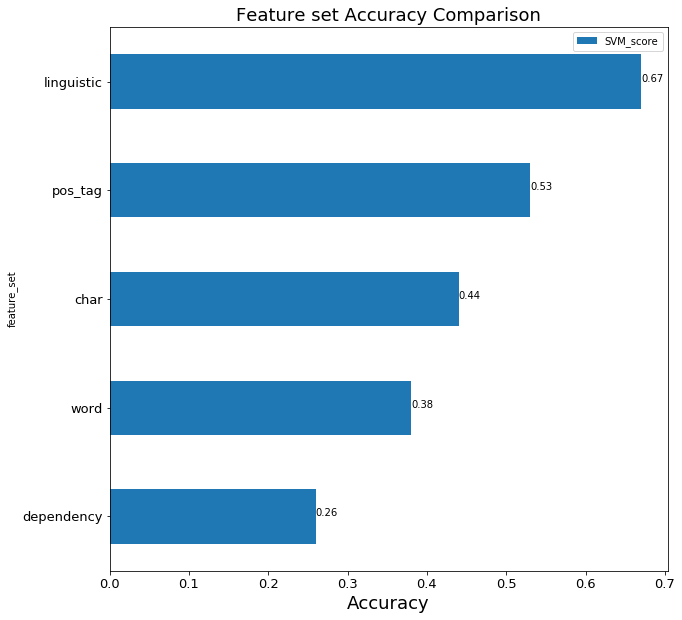

In [294]:
# SVM
features_set=["char","dependency","pos_tag","word","linguistic"]
SVM_score=[0.44,0.26,0.53,0.38,0.67]
SVM= pd.DataFrame()
SVM["feature_set"]=features_set

SVM["SVM_score"]=SVM_score
SVM=SVM.set_index("feature_set")
SVM=SVM.sort_values(['SVM_score'],ascending=True)
ax_1 = SVM.plot(kind='barh',figsize=(10,10),fontsize=13)
ax_1.set_alpha(0.8)
ax_1.set_title("Feature set Accuracy Comparison", fontsize=18)
ax_1.set_xlabel("Accuracy", fontsize=18)

for index, value in enumerate(SVM['SVM_score']):
    value=round(value,3)
    plt.text(value, index, str(value))

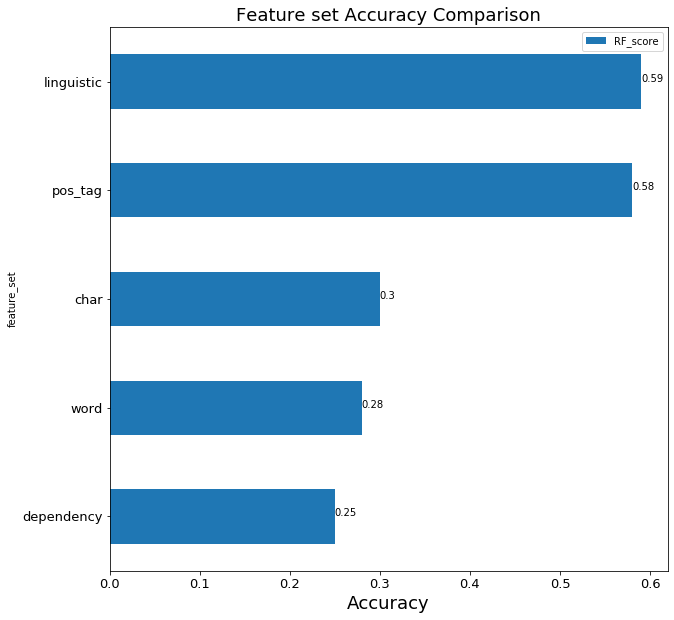

In [295]:
# Random Forest 
features_set=["char","dependency","pos_tag","word","linguistic"]
RF_score=[0.30,0.25,0.58,0.28,0.59]
RF= pd.DataFrame()
RF["feature_set"]=features_set

RF["RF_score"]=RF_score
RF=RF.set_index("feature_set")
RF=RF.sort_values(['RF_score'],ascending=True)
ax_2 = RF.plot(kind='barh',figsize=(10,10),fontsize=13)
ax_2.set_alpha(0.8)
ax_2.set_title("Feature set Accuracy Comparison", fontsize=18)
ax_2.set_xlabel("Accuracy", fontsize=18)

for index, value in enumerate(RF['RF_score']):
    value=round(value,3)
    plt.text(value, index, str(value))

## Modelling 

In [52]:
conda install -c anaconda py-xgboost


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/anaconda/noarch/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/anaconda/noarch'



Note: you may need to restart the kernel to use updated packages.


In [53]:
#from sklearn.model_selection import cross_val_score
#score=[]
#cv_score=[]
#for clf in classifiers:
    #clf.fit(X, y)
    #score.append(clf.score(X, y))
    #cv_score.append(cross_val_score(clf, x_final, y, cv=10).mean())
        
#score_comparison=pd.DataFrame((score,cv_score),columns=names,index=["score","cro_val_score"])
#score_comparison=pd.DataFrame(cv_score,columns=names)
#score_comparison

In [54]:
#score_comparison = pd.DataFrame({'Classifier':names,'CV_Scores':cv_score})
#score_comparison=score_comparison.set_index("Classifier")
#score_comparison

In [55]:
#score=score_comparison.sort_values(by='CV_Scores',ascending=True)
#score.plot(kind='barh')

### Model Selection and Evaluate by cross-Validation 

In [313]:
# import several classfier in sklearn to train 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from xgboost import XGBClassifier
import xgboost as xgb

# classifiers list
names = ["Decision Tree","SVC","Random Forest",
         "AdaBoost","ExtraTrees","Nearest Neighbors","Gaussian Process",
         "GaussianNB","Quadratic Discriminant","xgboost"]

classifiers = [
    DecisionTreeClassifier(),
    SVC(decision_function_shape='ovo'),
    #MLPClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier(),
    KNeighborsClassifier(),
    GaussianProcessClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    #LogisticRegression(multi_class='ovr', solver='lbfgs'),
    XGBClassifier(objective='multi:softprob')]


/Users/yuanlingou/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/yuanlingou/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/yuanlingou/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/yuanlingou/opt/anacon

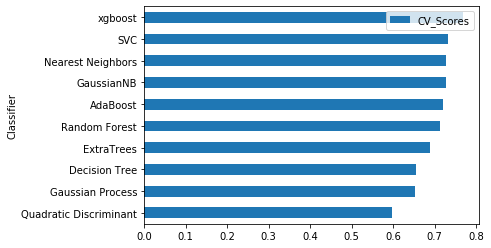

In [314]:
from sklearn.model_selection import cross_val_score
#score=[]
cv_score=[]
for clf in classifiers:
    #clf.fit(X, y)
    #score.append(clf.score(X, y))
    cv_score.append(cross_val_score(clf, x_train, y_train, cv=5).mean())
score_comparison = pd.DataFrame({'Classifier':names,'CV_Scores':cv_score})
score_comparison=score_comparison.set_index("Classifier")
score_comparison
score=score_comparison.sort_values(by='CV_Scores',ascending=True)
score.plot(kind='barh')

In [315]:
CV_5=score.sort_values(['CV_Scores'],ascending=True)

In [316]:
CV_5

,CV_Scores
Classifier,
Quadratic Discriminant,0.597737
Gaussian Process,0.653841
Decision Tree,0.655966
ExtraTrees,0.688957
Random Forest,0.712912
AdaBoost,0.721437
GaussianNB,0.726470
Nearest Neighbors,0.726542
SVC,0.733213


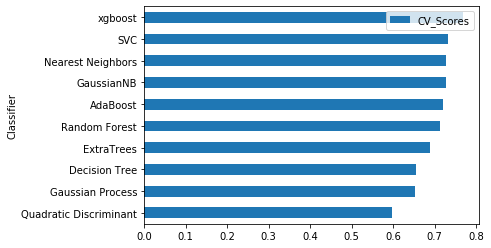

In [317]:
CV_5.sort_values(['CV_Scores'],ascending=True).plot(kind='barh')

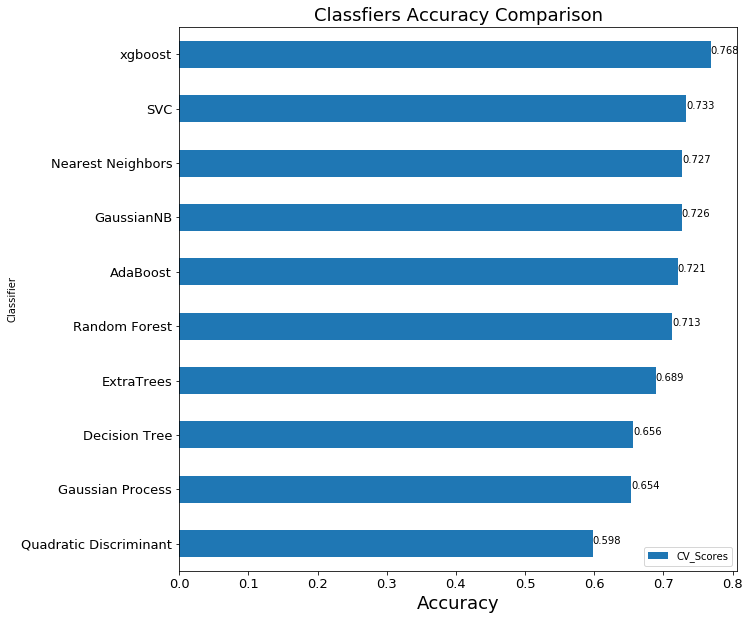

In [318]:
ax = CV_5.plot(kind='barh',figsize=(10,10),fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Classfiers Accuracy Comparison", fontsize=18)
ax.set_xlabel("Accuracy", fontsize=18)

for index, value in enumerate(CV_5['CV_Scores']):
    value=round(value,3)
    plt.text(value, index, str(value))

In [319]:
score.T

Classifier,Quadratic Discriminant,Gaussian Process,Decision Tree,ExtraTrees,Random Forest,AdaBoost,GaussianNB,Nearest Neighbors,SVC,xgboost
CV_Scores,0.597737,0.653841,0.655966,0.688957,0.712912,0.721437,0.72647,0.726542,0.733213,0.768357


### XGboost

In [320]:
from sklearn.metrics import accuracy_score
model=XGBClassifier()


In [321]:
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [322]:
y_pred_train = model.predict(x_train)
accuracy_percent_1 = accuracy_score(y_pred_train,y_train)
print(accuracy_percent_1)

1.0


In [323]:
# Calculating the accuracy of the model
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_percent = accuracy_score(y_test, y_pred)
print(accuracy_percent)

0.7280701754385965


## Paramter Tuning

### XGboost

In [75]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [76]:
estimator = XGBClassifier(
    objective= 'multi:softmax',
    num_class = 3,
    seed=14
)

In [282]:
parameters = {
    'max_depth': range (1, 6, 2),
    'n_estimators': range(60, 140, 40),
    'eta': [0.1, 0.01, 0.05,1],
    'reg_lambda':range (1, 6, 2),
'min_child_weight':[1,3,5]}

In [283]:
scoring = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'balanced_accuracy',
    cv = 5,
    n_jobs=1,
)

In [284]:
scoring.fit(x_train, y_train)

/Users/yuanlingou/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, num_class=3,
                                     objective='multi:softmax', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=14, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=1,
             param_grid={'eta': [0.1, 0.01, 0.05, 1],
                         'max_depth': range(1, 6, 2),
                

In [285]:
scoring.best_params_

{'eta': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 100,
 'reg_lambda': 3}

In [286]:
scoring.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=3, scale_pos_weight=1,
              seed=14, silent=None, subsample=1, verbosity=1)

In [287]:
print('Best Parameters',scoring.best_params_)
print('Best Score: ',scoring.best_score_)


Best Parameters {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'reg_lambda': 3}
Best Score:  0.7618232454751048


In [288]:
xgb2=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eta=0.1, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=14, silent=None, subsample=0.6, verbosity=1)
xgb2.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eta=0.1, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=14, silent=None, subsample=0.6, verbosity=1)

In [289]:
xgb2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eta=0.1, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=14, silent=None, subsample=0.6, verbosity=1)

In [290]:
y_pred_t = xgb2.predict(x_train)
y_pred_t

array([1, 1, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 2, 2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 2, 1, 2, 2, 2, 1, 2, 1, 0,
       2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 0, 1, 2, 0,
       1, 2, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0,
       1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2,
       0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 0, 0,
       0, 1, 2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 2,
       1, 2, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0, 0, 2, 1, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1,
       0, 2, 1, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 0, 1, 1, 0, 1, 2, 2,
       1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 2,
       2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2,
       0, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0,
       1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0,

In [292]:
# Train Accuracy 

y_pred_t = xgb2.predict(x_train)
accuracy_percent = accuracy_score(y_train, y_pred_t)
print(accuracy_percent)

TypeError: 'numpy.float64' object is not callable

In [280]:
#Accuracy of test data
score = xgb2.score(x_train, y_train)
print('Accuracy of test data: ',score)

Accuracy of test data:  0.9933774834437086


In [275]:
# Test Accuracy 
y_pred = xgb2.predict(x_test)
accuracy_percent = accuracy_score(y_test, y_pred)
print("classification Accuracy on Test Set", accuracy_percent)

TypeError: 'numpy.float64' object is not callable

In [281]:
#Accuracy of test data
score = xgb2.score(x_test, y_test)
print('Accuracy of test data: ',score)

Accuracy of test data:  0.7543859649122807


In [88]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[27  4  0]
 [ 7 33  3]
 [ 1  8 31]]


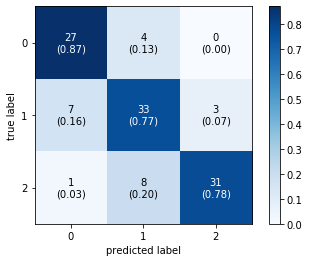

In [89]:
# Plot Confusion Matrix
#http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True) 

plt.show()

In [147]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_true=y_test
p = precision_score(y_true, y_pred, average='weighted')
r = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

In [105]:
print('Precision_score :',p)
print('F1_score :',f1)
print('Recall_score :',r)

Precision_score : 0.8063000638852031
F1_score : 0.799360963834648
Recall_score : 0.7982456140350878


In [126]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_true=y_test
p_1 = precision_score(y_true, y_pred, average='micro')
r_1 = recall_score(y_true, y_pred, average='micro')
f1_1 = f1_score(y_true, y_pred, average='micro')
print(p_1,r_1,f1_1)

0.7982456140350878 0.7982456140350878 0.7982456140350878


In [106]:
len(y_test)

114

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        31
           1       0.73      0.77      0.75        43
           2       0.91      0.78      0.84        40

    accuracy                           0.80       114
   macro avg       0.81      0.80      0.80       114
weighted avg       0.81      0.80      0.80       114



## ROC

In [172]:
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import numpy as np

In [182]:
from sklearn.preprocessing import label_binarize
y_roc = label_binarize(y, classes=[0, 1, 2])
n_classes = y_roc.shape[1]

In [223]:
# Feature importance analysis 
importance=model.feature_importances_
importance_pd=pd.Series(data=model.feature_importances_, index=x_train.columns).sort_values(ascending=False)
importance_pd_sort=importance_pd.sort_values(ascending=False)

In [224]:
feature_imp=pd.DataFrame(importance_pd_sort)

In [225]:
feature_imp.columns = ['Feature_Importance']
feature_imp.sort_values(['Feature_Importance'],ascending=True,inplace=True)

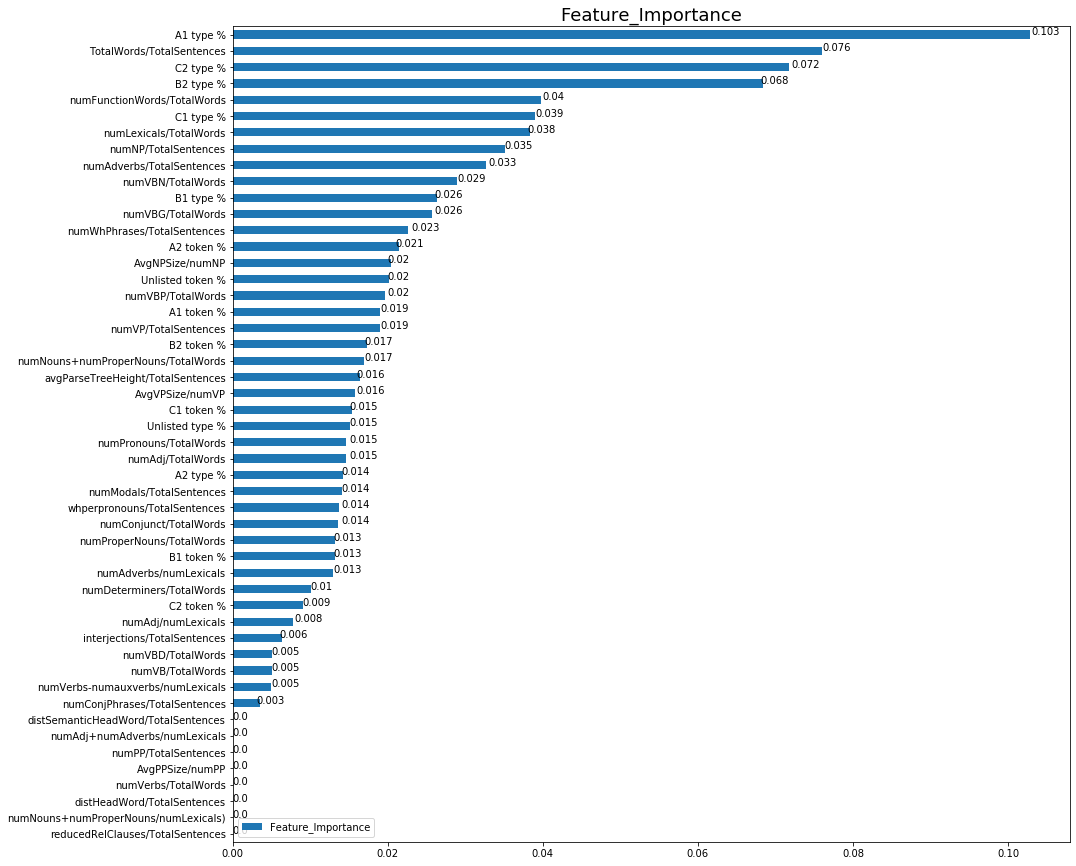

In [226]:
ax_3 = feature_imp.plot(kind='barh',figsize=(15,15),fontsize=10)
ax_3.set_alpha(0.8)
ax_3.set_title("Feature_Importance", fontsize=18)
#ax_3.set_xlabel("Features", fontsize=18)
for index, value in enumerate(feature_imp['Feature_Importance']):
    value=round(value,3)
    plt.text(value, index, str(value))

In [236]:
features_important= feature_imp.tail(10)
features_important.sort_values(['Feature_Importance'],ascending=False,inplace=True)
features_important

/Users/yuanlingou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Feature_Importance
A1 type %,0.102808
TotalWords/TotalSentences,0.076000
C2 type %,0.071732
B2 type %,0.068358
numFunctionWords/TotalWords,0.039794
C1 type %,0.038941
numLexicals/TotalWords,0.038341
numNP/TotalSentences,0.035110
numAdverbs/TotalSentences,0.032698
numVBN/TotalWords,0.028868


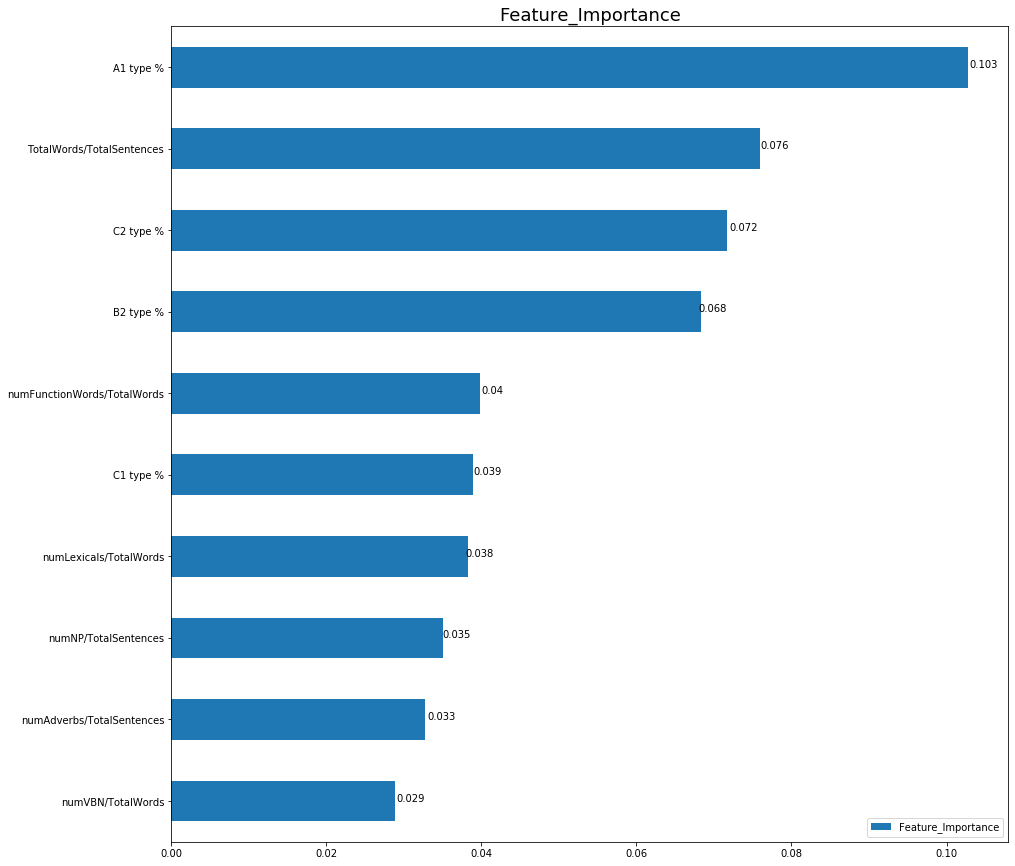

In [235]:
ax_3 = features_important.plot(kind='barh',figsize=(15,15),fontsize=10)
ax_3.set_alpha(0.8)
ax_3.set_title("Feature_Importance", fontsize=18)
#ax_3.set_xlabel("Features", fontsize=18)
for index, value in enumerate(features_important['Feature_Importance']):
    value=round(value,3)
    plt.text(value, index, str(value))

### Barclays_T&Cs

In [245]:
data_Barcalys = pd.read_csv('/Users/yuanlingou/Desktop/Dissertation/Code/OneStopEng_2/data/paresed_features/Barclays_f/Barclays_T&Cs_Features.csv',sep=',', header=0)

In [246]:
data_Barcalys

,TotalSentences,TotalWords/TotalSentences,numNouns+numProperNouns/TotalWords,numProperNouns/TotalWords,numPronouns/TotalWords,numConjunct/TotalWords,numAdj/TotalWords,numVerbs/TotalWords,numNP/TotalSentences,numVP/TotalSentences,...,C1 type %,C2 type %,Unlisted type %,A1 token %,A2 token %,B1 token %,B2 token %,C1 token %,C2 token %,Unlisted token %
0,5,15.80,0.34,0.01,0.28,0.03,0.04,0.19,8.00,3.60,...,0.00,0.00,29.17,50.00,3.12,3.12,9.38,0.00,0.00,34.38
1,5,32.80,0.30,0.00,0.17,0.07,0.13,0.15,12.60,7.60,...,1.35,0.00,4.05,58.87,12.10,11.29,13.71,0.81,0.00,3.23
2,13,31.08,0.32,0.01,0.15,0.02,0.09,0.23,13.85,8.15,...,3.30,0.00,9.89,49.33,11.33,20.67,7.33,2.00,0.00,9.33
3,10,19.80,0.29,0.01,0.18,0.05,0.12,0.19,8.00,5.50,...,2.44,0.00,9.76,65.00,5.00,11.67,8.33,1.67,0.00,8.33
4,18,19.78,0.33,0.00,0.17,0.02,0.07,0.18,8.83,5.22,...,0.00,0.97,9.71,57.72,11.38,12.20,11.79,0.00,0.41,6.50
5,4,28.50,0.28,0.01,0.17,0.05,0.11,0.18,10.50,6.75,...,2.00,2.00,4.00,61.36,9.09,18.18,4.55,1.14,1.14,4.55
6,1,21.00,0.57,0.33,0.05,0.05,0.00,0.24,11.00,5.00,...,1.31,0.00,7.19,52.33,8.90,20.34,11.23,1.27,0.00,5.93
7,7,14.71,0.38,0.10,0.15,0.03,0.10,0.15,8.43,2.57,...,1.74,0.00,5.22,61.49,11.33,12.62,11.33,0.65,0.00,2.59
8,6,17.00,0.43,0.04,0.11,0.03,0.08,0.18,7.50,4.17,...,0.56,0.00,7.26,60.59,11.95,13.63,8.81,0.21,0.00,4.82
9,13,20.00,0.35,0.10,0.16,0.04,0.09,0.16,7.85,4.85,...,0.00,0.00,5.33,53.40,13.09,10.47,15.71,0.00,0.00,7.33


In [247]:
data_Barcalys.describe()

,TotalSentences,TotalWords/TotalSentences,numNouns+numProperNouns/TotalWords,numProperNouns/TotalWords,numPronouns/TotalWords,numConjunct/TotalWords,numAdj/TotalWords,numVerbs/TotalWords,numNP/TotalSentences,numVP/TotalSentences,...,C1 type %,C2 type %,Unlisted type %,A1 token %,A2 token %,B1 token %,B2 token %,C1 token %,C2 token %,Unlisted token %
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,7.733333,21.240667,0.344000,0.071333,0.160667,0.040667,0.074667,0.19200,9.382000,5.466000,...,1.729333,0.638000,9.834667,54.654000,11.024000,13.138000,9.764667,1.244667,0.464667,9.711333
std,5.229950,5.777018,0.120878,0.124204,0.051612,0.014376,0.038889,0.04246,2.179594,1.945342,...,2.293863,1.213526,8.380033,11.245767,3.605959,4.530593,3.502839,2.187960,1.128373,9.442944
min,1.000000,14.710000,0.210000,0.000000,0.050000,0.020000,0.000000,0.10000,5.500000,1.500000,...,0.000000,0.000000,3.080000,17.390000,3.120000,3.120000,4.550000,0.000000,0.000000,2.590000
25%,4.000000,17.000000,0.285000,0.010000,0.150000,0.030000,0.060000,0.17000,8.000000,4.510000,...,0.000000,0.000000,5.275000,52.865000,9.405000,10.880000,6.985000,0.000000,0.000000,5.230000
50%,6.000000,19.800000,0.320000,0.010000,0.170000,0.040000,0.080000,0.19000,8.830000,5.330000,...,1.310000,0.000000,7.260000,57.720000,11.380000,12.230000,9.380000,0.650000,0.000000,6.500000
75%,11.500000,24.195000,0.365000,0.070000,0.170000,0.050000,0.100000,0.22500,10.835000,7.155000,...,2.220000,0.845000,9.735000,60.975000,12.770000,15.565000,12.415000,1.470000,0.360000,8.665000
max,18.000000,32.800000,0.630000,0.400000,0.280000,0.070000,0.130000,0.26000,13.850000,8.150000,...,8.700000,4.350000,30.430000,65.000000,17.540000,20.670000,15.710000,8.700000,4.350000,34.380000


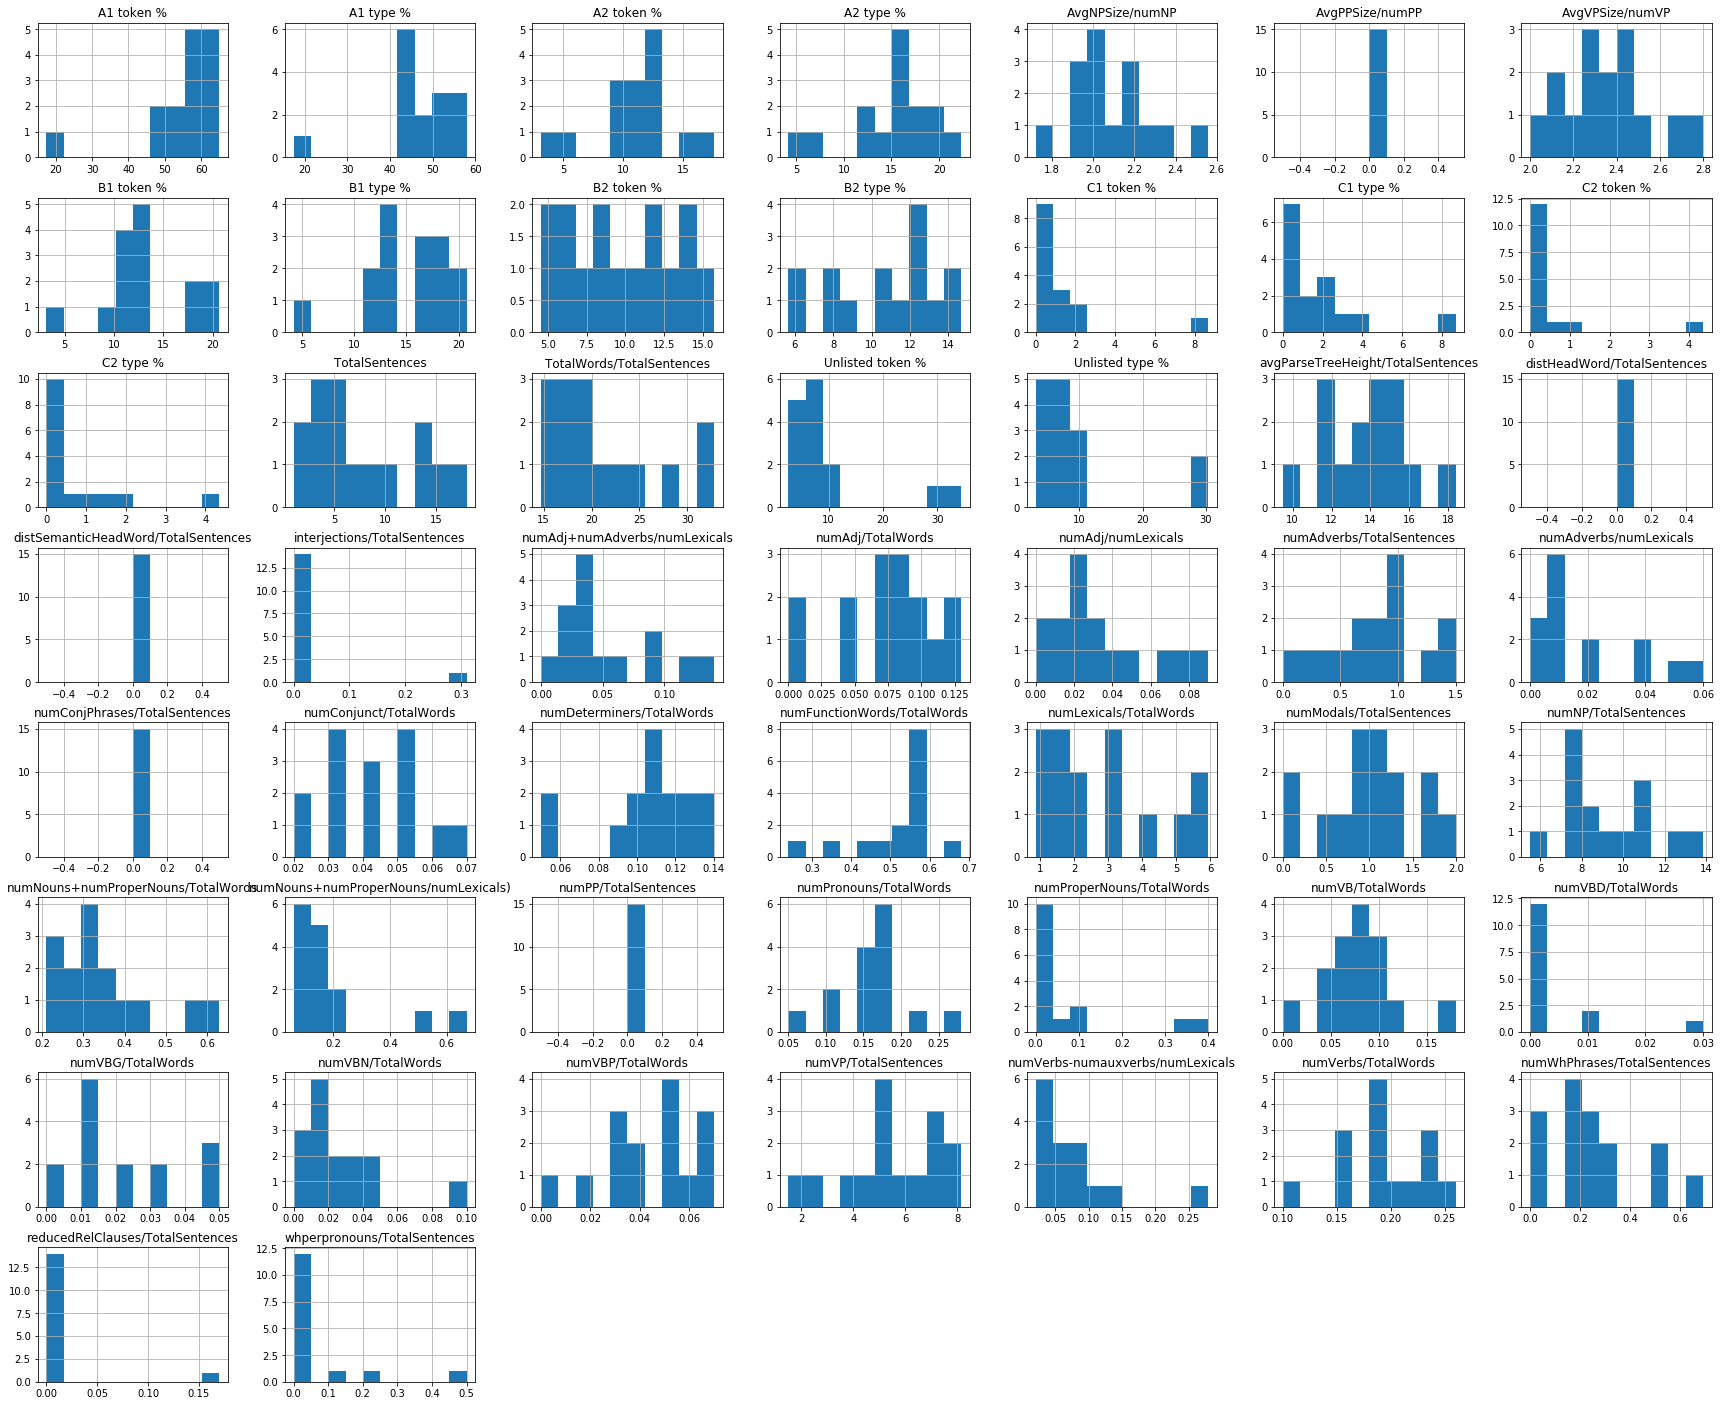

In [249]:
import matplotlib.pyplot as plt
data_Barcalys.hist(bins=10,figsize=(30,25))
plt.show()

In [250]:
data_Agr=data_Barcalys.drop("TotalSentences",axis=1)
data_Agr

,TotalWords/TotalSentences,numNouns+numProperNouns/TotalWords,numProperNouns/TotalWords,numPronouns/TotalWords,numConjunct/TotalWords,numAdj/TotalWords,numVerbs/TotalWords,numNP/TotalSentences,numVP/TotalSentences,numPP/TotalSentences,...,C1 type %,C2 type %,Unlisted type %,A1 token %,A2 token %,B1 token %,B2 token %,C1 token %,C2 token %,Unlisted token %
0,15.80,0.34,0.01,0.28,0.03,0.04,0.19,8.00,3.60,0,...,0.00,0.00,29.17,50.00,3.12,3.12,9.38,0.00,0.00,34.38
1,32.80,0.30,0.00,0.17,0.07,0.13,0.15,12.60,7.60,0,...,1.35,0.00,4.05,58.87,12.10,11.29,13.71,0.81,0.00,3.23
2,31.08,0.32,0.01,0.15,0.02,0.09,0.23,13.85,8.15,0,...,3.30,0.00,9.89,49.33,11.33,20.67,7.33,2.00,0.00,9.33
3,19.80,0.29,0.01,0.18,0.05,0.12,0.19,8.00,5.50,0,...,2.44,0.00,9.76,65.00,5.00,11.67,8.33,1.67,0.00,8.33
4,19.78,0.33,0.00,0.17,0.02,0.07,0.18,8.83,5.22,0,...,0.00,0.97,9.71,57.72,11.38,12.20,11.79,0.00,0.41,6.50
5,28.50,0.28,0.01,0.17,0.05,0.11,0.18,10.50,6.75,0,...,2.00,2.00,4.00,61.36,9.09,18.18,4.55,1.14,1.14,4.55
6,21.00,0.57,0.33,0.05,0.05,0.00,0.24,11.00,5.00,0,...,1.31,0.00,7.19,52.33,8.90,20.34,11.23,1.27,0.00,5.93
7,14.71,0.38,0.10,0.15,0.03,0.10,0.15,8.43,2.57,0,...,1.74,0.00,5.22,61.49,11.33,12.62,11.33,0.65,0.00,2.59
8,17.00,0.43,0.04,0.11,0.03,0.08,0.18,7.50,4.17,0,...,0.56,0.00,7.26,60.59,11.95,13.63,8.81,0.21,0.00,4.82
9,20.00,0.35,0.10,0.16,0.04,0.09,0.16,7.85,4.85,0,...,0.00,0.00,5.33,53.40,13.09,10.47,15.71,0.00,0.00,7.33


In [252]:
X_agr=data_Agr
data_Agr['y_agr_pred'] = xgb2.predict(X_agr)

In [256]:
data_Agr

,TotalWords/TotalSentences,numNouns+numProperNouns/TotalWords,numProperNouns/TotalWords,numPronouns/TotalWords,numConjunct/TotalWords,numAdj/TotalWords,numVerbs/TotalWords,numNP/TotalSentences,numVP/TotalSentences,numPP/TotalSentences,...,C2 type %,Unlisted type %,A1 token %,A2 token %,B1 token %,B2 token %,C1 token %,C2 token %,Unlisted token %,y_agr_pred
0,15.80,0.34,0.01,0.28,0.03,0.04,0.19,8.00,3.60,0,...,0.00,29.17,50.00,3.12,3.12,9.38,0.00,0.00,34.38,0
1,32.80,0.30,0.00,0.17,0.07,0.13,0.15,12.60,7.60,0,...,0.00,4.05,58.87,12.10,11.29,13.71,0.81,0.00,3.23,0
2,31.08,0.32,0.01,0.15,0.02,0.09,0.23,13.85,8.15,0,...,0.00,9.89,49.33,11.33,20.67,7.33,2.00,0.00,9.33,2
3,19.80,0.29,0.01,0.18,0.05,0.12,0.19,8.00,5.50,0,...,0.00,9.76,65.00,5.00,11.67,8.33,1.67,0.00,8.33,0
4,19.78,0.33,0.00,0.17,0.02,0.07,0.18,8.83,5.22,0,...,0.97,9.71,57.72,11.38,12.20,11.79,0.00,0.41,6.50,0
5,28.50,0.28,0.01,0.17,0.05,0.11,0.18,10.50,6.75,0,...,2.00,4.00,61.36,9.09,18.18,4.55,1.14,1.14,4.55,2
6,21.00,0.57,0.33,0.05,0.05,0.00,0.24,11.00,5.00,0,...,0.00,7.19,52.33,8.90,20.34,11.23,1.27,0.00,5.93,1
7,14.71,0.38,0.10,0.15,0.03,0.10,0.15,8.43,2.57,0,...,0.00,5.22,61.49,11.33,12.62,11.33,0.65,0.00,2.59,0
8,17.00,0.43,0.04,0.11,0.03,0.08,0.18,7.50,4.17,0,...,0.00,7.26,60.59,11.95,13.63,8.81,0.21,0.00,4.82,1
9,20.00,0.35,0.10,0.16,0.04,0.09,0.16,7.85,4.85,0,...,0.00,5.33,53.40,13.09,10.47,15.71,0.00,0.00,7.33,0


In [259]:
data_Agr.loc[data_Agr["y_agr_pred"] == 1].head()

,TotalWords/TotalSentences,numNouns+numProperNouns/TotalWords,numProperNouns/TotalWords,numPronouns/TotalWords,numConjunct/TotalWords,numAdj/TotalWords,numVerbs/TotalWords,numNP/TotalSentences,numVP/TotalSentences,numPP/TotalSentences,...,C2 type %,Unlisted type %,A1 token %,A2 token %,B1 token %,B2 token %,C1 token %,C2 token %,Unlisted token %,y_agr_pred
6,21.0,0.57,0.33,0.05,0.05,0.00,0.24,11.0,5.00,0,...,0.0,7.19,52.33,8.90,20.34,11.23,1.27,0.0,5.93,1
8,17.0,0.43,0.04,0.11,0.03,0.08,0.18,7.5,4.17,0,...,0.0,7.26,60.59,11.95,13.63,8.81,0.21,0.0,4.82,1


In [262]:
data_Agr.loc[data_Agr["y_agr_pred"] == 0].head(10)

,TotalWords/TotalSentences,numNouns+numProperNouns/TotalWords,numProperNouns/TotalWords,numPronouns/TotalWords,numConjunct/TotalWords,numAdj/TotalWords,numVerbs/TotalWords,numNP/TotalSentences,numVP/TotalSentences,numPP/TotalSentences,...,C2 type %,Unlisted type %,A1 token %,A2 token %,B1 token %,B2 token %,C1 token %,C2 token %,Unlisted token %,y_agr_pred
0,15.80,0.34,0.01,0.28,0.03,0.04,0.19,8.00,3.60,0,...,0.00,29.17,50.00,3.12,3.12,9.38,0.00,0.00,34.38,0
1,32.80,0.30,0.00,0.17,0.07,0.13,0.15,12.60,7.60,0,...,0.00,4.05,58.87,12.10,11.29,13.71,0.81,0.00,3.23,0
3,19.80,0.29,0.01,0.18,0.05,0.12,0.19,8.00,5.50,0,...,0.00,9.76,65.00,5.00,11.67,8.33,1.67,0.00,8.33,0
4,19.78,0.33,0.00,0.17,0.02,0.07,0.18,8.83,5.22,0,...,0.97,9.71,57.72,11.38,12.20,11.79,0.00,0.41,6.50,0
7,14.71,0.38,0.10,0.15,0.03,0.10,0.15,8.43,2.57,0,...,0.00,5.22,61.49,11.33,12.62,11.33,0.65,0.00,2.59,0
9,20.00,0.35,0.10,0.16,0.04,0.09,0.16,7.85,4.85,0,...,0.00,5.33,53.40,13.09,10.47,15.71,0.00,0.00,7.33,0
10,17.75,0.21,0.03,0.17,0.04,0.07,0.24,5.50,7.25,0,...,0.00,3.08,56.64,17.54,10.19,6.64,0.00,0.00,9.00,0
12,15.00,0.63,0.40,0.10,0.03,0.00,0.10,8.00,1.50,0,...,1.53,7.63,61.45,15.27,9.92,4.58,1.91,0.76,6.11,0
13,25.06,0.30,0.02,0.17,0.05,0.07,0.21,11.00,7.06,0,...,0.00,7.55,56.25,12.50,17.50,6.25,0.00,0.00,7.50,0


In [261]:
data_Agr.loc[data_Agr["y_agr_pred"] == 2].head()

,TotalWords/TotalSentences,numNouns+numProperNouns/TotalWords,numProperNouns/TotalWords,numPronouns/TotalWords,numConjunct/TotalWords,numAdj/TotalWords,numVerbs/TotalWords,numNP/TotalSentences,numVP/TotalSentences,numPP/TotalSentences,...,C2 type %,Unlisted type %,A1 token %,A2 token %,B1 token %,B2 token %,C1 token %,C2 token %,Unlisted token %,y_agr_pred
2,31.08,0.32,0.01,0.15,0.02,0.09,0.23,13.85,8.15,0,...,0.00,9.89,49.33,11.33,20.67,7.33,2.00,0.00,9.33,2
5,28.50,0.28,0.01,0.17,0.05,0.11,0.18,10.50,6.75,0,...,2.00,4.00,61.36,9.09,18.18,4.55,1.14,1.14,4.55,2
11,23.33,0.21,0.01,0.22,0.04,0.05,0.26,10.67,7.44,0,...,0.72,7.25,57.99,9.72,12.23,13.79,0.31,0.31,5.64,2
14,17.00,0.22,0.00,0.16,0.06,0.10,0.22,9.00,5.33,0,...,4.35,30.43,17.39,13.04,13.04,13.04,8.70,4.35,30.43,2
